<a href="https://colab.research.google.com/github/vqrca/bootcamp_alura_projeto_final/blob/main/Notebooks/Valqu%C3%ADria_Alencar_Projeto_final_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

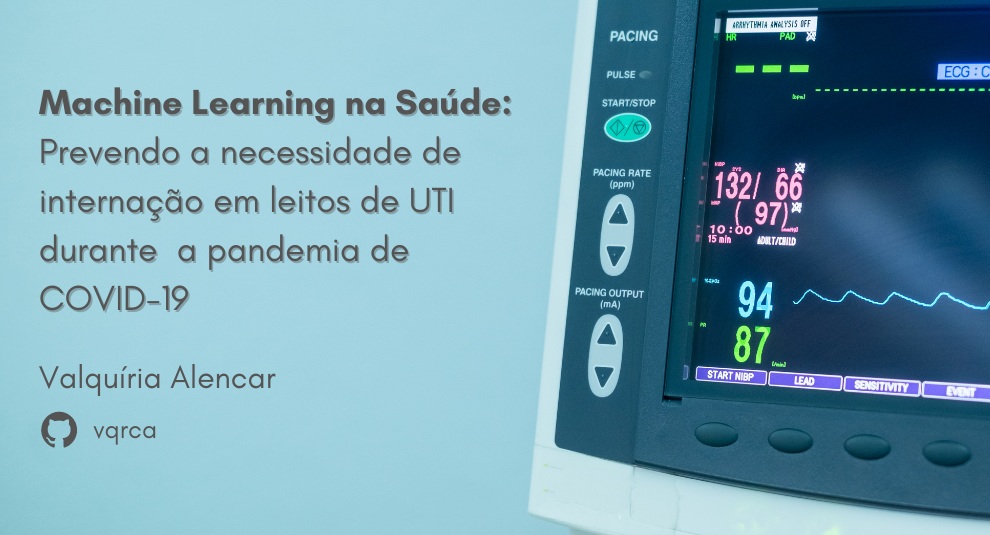

#**A Estrutura do notebook é a seguinte:**

🏃‍♀️ [Resumo](#resumo)

👩‍💻 [Entendendo Conceitos de Machine Learning](#introducao)

🏗️ [Instalações](#instalacoes)

🐍 [Importação das Bibliotecas](#bibliotecas)

▶️[Funções](#funcoes)

🎲 [Importação dos Dados](#importacao)

➗ [Separação dos Dados](#separacao)

🔮 [Modelos de Machine Learning](#modelos)
  - [Usando a biblioteca LazyClassifier](#lazy)
    - [XGBClassifier](#xgb)
    - [ExtraTreesClassifier](#extra)
    - [LogisticRegression](#logistic)
    - [RandomForestClassifier](#forest)
  - [Testando as Melhores Features com Featurewiz](#features)
  - [Testes nos Hiperparâmetros com GridSearchCV](#hiper)

✅ [Seleção do Modelo](#selecao)

💡 [Conclusões](#conclusoes)

🚀[Considerações finais](#final)

📄[Referências](#referencias)

📚[Documentação](#documentacao)

👏[Agradecimentos](#agradecimentos)

📪[Onde me encontrar?](#contato)



<a name="resumo"></a>
#**Resumo** 🏃‍♀️

- Com sua rápida disseminação, a doença **COVID-19** criou uma forte demanda por hospitais e leitos nas UTIs (Unidades de Terapia Intensiva). Esta maior necessidade de recursos hospitalares levou ao **colapso dos sistemas de saúde** em todo o mundo, o que pode ter contribuído para as maiores taxas de mortalidade relatadas. 

- Pensando nisso, o **Hospital Sírio Libânes disponibilizou um *dataset*** contendo **informações sobre vários pacientes**, com os seguintes objetivos: **Prever admissão na UTI de casos confirmados de COVID-19 e prever a NÃO admissão à UTI de casos COVID-19 confirmados**.  

- **Dessa forma, o presente projeto dedicou-se a criar um modelo de Machine learning  para prever quais pacientes precisarão ser admitidos na unidade de terapia intensiva e assim, definir qual a necessidade de leitos de UTI do hospital, a partir dos dados clínicos individuais disponíveis**. 

- Os dados deste dataset estão organizados em janelas tempo, após a admissão dos pacientes no hospital: 0-2 horas, 2-4 horas, 4-6 horas, 6-12 horas e  acima de 12 horas após a admissão. Além disso, o dataset conta com informações demográficas, doenças pré-existentes, resultados de exames de sangue e sinais vitais. Finalmente, o dataset contém a coluna `ICU`, que é a variável de interesse e indica se o paciente foi ou não para UTI. 

- Então, **os dados foram pré-processados e somente a janela de 0-2 horas foi utilizada**, já que quanto mais cedo a previsão for feita é melhor, tornando-se clinicamente mais relevante. Além disso, as features com alta correlação foram retiradas e o conjunto de dados foi dividido em treinamento e teste. 

- A biblioteca ***LazyPredict* foi utilizada para identificar quais seriam os melhores classificadores possíveis para esses dados**. Em seguida, os **classificadores que apresentaram melhor desempenho** foram estudados individualmente, passando por **análises de métricas e *Cross-Validation***. 

- Dois classificadores se mostraram mais adequados: *XGBClassifier* e *RandomForestClassifier*, e a partir deles os hiperparâmetros foram testados, através do *GridSearchCV*. O **modelo escolhido**, por apresentar as melhores métricas, após o ajuste de hiperparâmetros, foi o ***XGBClassifier***. O modelo apresentou, nos dados de teste, **83.10% de acurácia e AUC de 0.84**. **Se o paciente realmente precisa de UTI, o modelo tem 82% de chance de acertar**. Enquanto isso,  **no caso do paciente não necessitar de internação em leito de UTI o modelo acerta em 84%**. 

- Será imprescindível tentar melhorar ainda mais estes resultados e difundir o uso de uma ferramenta como essa para definir qual a necessidade de leitos de UTI nos hospitais, não só para o COVID-19, mas para outras doenças - aumentando a excelência no planejamento de recursos e o nível de atendimento ao paciente.

<a name="introducao"></a>
#**Entendendo Conceitos de Machine Learning**👩‍💻 

De acordo com [Molnar (2018)](http://ganj-ie.iust.ac.ir:8081/images/6/69/Interpretable-machine-learning.pdf), o aprendizado de máquina é um método para ensinar computadores a fazer e melhorar previsões ou comportamentos baseado em dados. Esse processo é baseado num conjunto de algoritmos que podem aprender esses mapeamentos a partir de dados de treinamento. Se a saída for categórica, como é o caso deste projeto, em que temos valores de 1 e 0 na coluna ICU,  indicando se o paciente foi ou não para um leito de UTI, a tarefa é chamada de classificação. 
 
####**Definições:**

- **Algoritmo:** Um algoritmo é um conjunto de regras que uma máquina segue para atingir um objetivo específico. Vamos pensar em um exemplo simples... pense numa receita: as receitas culinárias são algoritmos, onde os ingredientes são os dados entradas, a refeição cozida é o dado de saída e as etapas de preparação e cozimento são as instruções dos algoritmos 

- ***Dataset:*** uma tabela contendo os dados a partir dos quais a máquina aprende. O conjunto de dados contém as features e o nosso target. 

- ***Features:*** As características/informações contidas nas colunas do dataset usadas para classificação.

- ***Target:*** aquilo que a máquina aprende a prever 
> No nosso caso é a coluna ICU

- **Predição:** o modelo de aprendizado de máquina “adivinha” o valor do target com base nas features.
 
###**Métricas de Avaliação**
Após treinar os modelos é necessário avaliarmos algumas métricas para saber como esses modelos estão lidando com os dados:
 

####**Confusion Matrix (Matriz de Confusão)**
 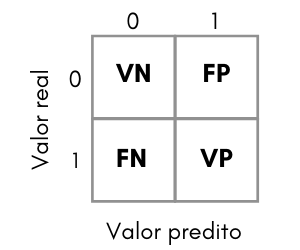


 
Temos siglas importantes na matriz de confusão:
- VP = verdadeiro positivo (label=1 e predição=1) - Quando o paciente precisa ir para UTI
- VN = verdadeiro negativo (label=0 e predição=0) - Quando o paciente não precisa ir para UTI
- FP = falso positivo (label=0 e predição=1) - Quando o paciente não precisa ir para UTI, mas a predição diz que ele precisa de um leito de UTI
- FN = falso negativo (label=1 e predição=1) - Quando o paciente precisa ir para UTI, mas a predição diz que ele não precisa de um leito de UTI
 
####**Acurácia**
Acurácia é a quantidade de acertos do nosso modelo dividido pelo total da amostra.

Com ela queremos responder a seguinte pergunta: o quão certo meu modelo está?

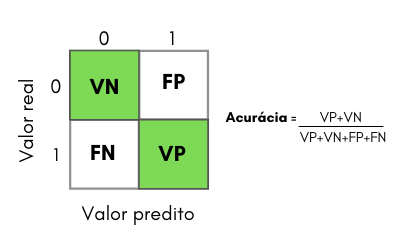
 
####**Precision**
Mostra quantos positivos (VP e FP) estão corretos, para ter certeza do que estamos acertando. É ótima para ser analisada quando o falso positivo é pior que o falso negativo.

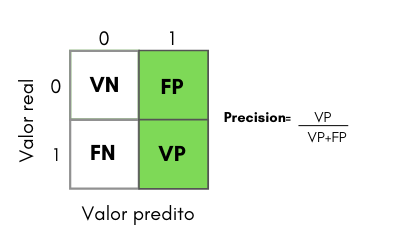


####**Recall**
Recall mostra a proporção dos Verdadeiros Positivos entre todas as observações que realmente são positivas no seu conjunto de dados.  É uma métrica que apresenta maior sensibilidade e representa a capacidade de um modelo em prever a classe positiva.

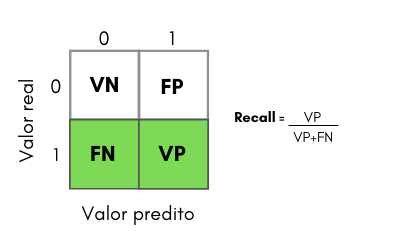
 

####**F1-Score**
 
Pelo F1 é possível ver se a precisão ou recall estão muito baixos. Isso é calculado através da média harmônica. Média harmônica é a quantidade de elementos no conjunto, divida pela soma do inverso dos elementos do conjunto:

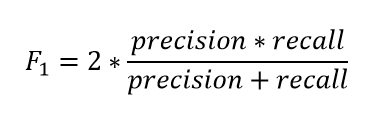
 
 
####**ROC AUC (Area Under the Receiver Operating Characteristic Curve)**
A pontuação ROC AUC é extremamente útil, pois mostra o quão bom é o seu modelo nas previsões de classificação. Ele informa qual é a probabilidade de uma instância positiva escolhida aleatoriamente ter uma classificação mais alta do que uma instância negativa escolhida aleatoriamente. É um gráfico que visualiza a compensação entre a taxa de verdadeiro positivo (TPR) e a taxa de falso positivo (FPR). Basicamente, para cada limite, calculamos TPR e FPR e os plotamos em um gráfico.
Obviamente, quanto maior o TPR e o menor FPR para cada limite, melhor e, portanto, os classificadores que têm curvas mais no canto superior esquerdo são melhores. Quanto mais alto o valor de AUC (Area Under the Curve), que é a área que está abaixo da curva ROC: melhor está a performance do modelo, como podemos verificar na figura abaixo:
 
 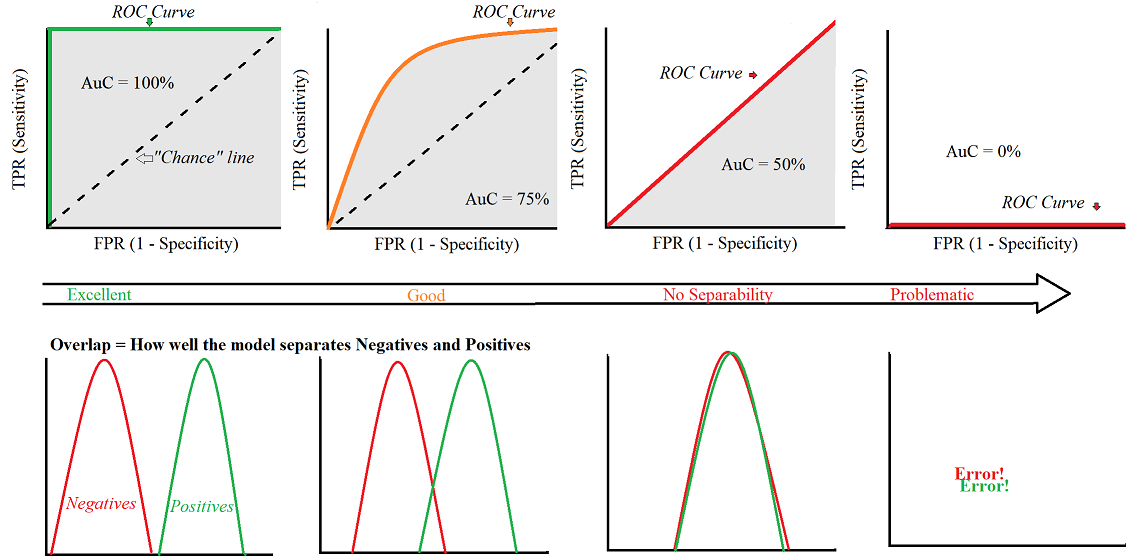

 
###**Cross-Validation (Validação Cruzada)**

Quando separamos os dados para Treino e Teste, o efeito de aleatoriedade é muito grande. Então, a escolha do algoritmo passa a ter um nível de incerteza um pouco maior. Portanto, é ideal fazer a divisão dos dados de uma forma mais estratégica, utilizando o Cross-Validation. Usando essa abordagem o conjunto de dados é dividido em várias partes. A cada momento uma parte desses dados será utilizada como teste e o restante como treino, garantindo que todos os dados sejam testados e treinados:
 
 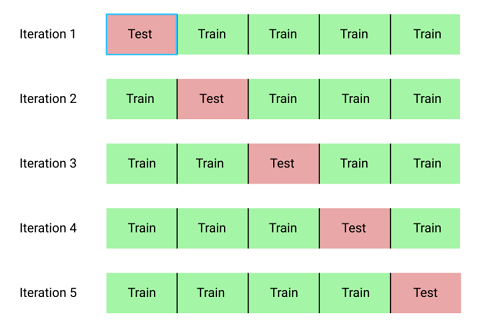
 

 
 
 
 
 


<a name="instalacoes"></a>
#**Instalações** 🏗️

Antes de importar as bibliotecas e executar as análises as instalações abaixo precisam ser realizadas:

In [ ]:
!pip install lazypredict

In [ ]:
!pip install yellowbrick

In [ ]:
!pip install featurewiz

<a name="bibliotecas"></a>
#**Importando as bibliotecas** 🐍

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier, LazyRegressor
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn import datasets, metrics, model_selection, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from yellowbrick.features.importances import FeatureImportances
from yellowbrick.classifier import ROCAUC
from featurewiz import featurewiz
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Imported featurewiz: advanced feature engg and selection library. Version=0.0.42
output = featurewiz(dataname, target, corr_limit=0.70,
                    verbose=2, sep=',', header=0, test_data='',
                    feature_engg='', category_encoders='')
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


<a name="funcoes"></a>
#**Funções** ▶️

In [3]:
'''
Essa função retorna um gráfico que mostras
para quais features o modelo dá maior importância
'''
def feature_importances (dados, modelo):

  #Definindo x e y
  x = dados.drop(['ICU'], axis=1) 
  y= dados['ICU']

  np.random.seed(727356) #para garantir a reprodutibilidade

  #Separando os dados em treino e teste
  x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, stratify=y, random_state=0)

  #Treino
  modelo.fit(x_train,y_train)

  #Predição
  predicao_dados = modelo.predict(x_test)
  
  fig,ax = plt.subplots(figsize=(10,20))

  fi_viz = FeatureImportances(modelo)
  fi_viz.fit(x_test,y_test)
  
  fi_viz.poof()

In [4]:
'''
Essa função faz o treino e predição dos dados
e retorna o valor de acurácia do modelo
'''
def acuracia(dados, modelo):

  #Definindo x e y
  x = dados.drop(['ICU'], axis=1) 
  y= dados['ICU']

  np.random.seed(727356) #para garantir a reprodutibilidade

  #Separando os dados em treino e teste
  x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, stratify=y, random_state=0)

  #Treino
  modelo.fit(x_train,y_train)

  #Predição
  prediction = modelo.predict(x_test)

  print(f"A acurácia do Modelo é de: {(accuracy_score(y_test, prediction))*100 :.2f} %")

In [5]:
'''
Essa função retorna a matriz de confusão
com os valores normalizados
'''
def confusion_matrix(dados, modelo):

  #Definindo x e y
  x = dados.drop(['ICU'], axis=1) 
  y= dados['ICU']

  np.random.seed(727356) #para garantir a reprodutibilidade

  #Separando os dados em treino e teste
  x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, stratify=y, random_state=0)

  #Treino
  modelo.fit(x_train,y_train)

  #Predição
  predicao_dados = modelo.predict(x_test)

  #Plotando a matriz de confusão
  fig, ax = plt.subplots(figsize=(7,7))
  plot_confusion_matrix(modelo, x_test, y_test, normalize='true',ax=ax, display_labels=['Não precisa \n de internação','UTI'], cmap=plt.cm.Blues)
  ax.set_title("Matriz de Confusão\n Normalizada", fontsize=16, fontweight="bold")
  ax.set_xlabel("Label predita", fontsize=18)
  ax.set_ylabel("Label verdadeira", fontsize=18)
  plt.grid(False)
  plt.show()

In [6]:
'''
Essa função treina os dados e faz a predição, retornando
o valor de AUC e o Classfication Report
'''
def roda_modelo(dados, modelo):

  #Definindo x e y
  x = dados.drop(["ICU"], axis=1)
  y = dados["ICU"]

  np.random.seed(727356) #para garantir a reprodutibilidade
 
  #Separando os dados em treino e teste
  x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.2, stratify=y)

  #Treino
  modelo.fit(x_train, y_train)

  #Predição
  predicao = modelo.predict(x_test)

  #Obtendo valor de AUC e classification report
  prob_predict = modelo.predict_proba(x_test)

  auc = roc_auc_score(y_test, prob_predict[:,1])
  print(f"AUC {auc}")
  print("\nClassification Report\n")
  print(classification_report(y_test, predicao))
  

In [7]:
'''
Essa função plota o gráfico da Curva ROC
'''
def plotar_roc_auc(dados, modelo):

  #Definindo x e y
  x = dados.drop(["ICU"], axis=1)
  y = dados["ICU"]
  
  np.random.seed(727356) #para garantir a reprodutibilidade
 
  #Separando os dados em treino e teste
  x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.2, stratify=y)

  #Treino
  modelo.fit(x_train, y_train) 

  #Predição
  predicao = modelo.predict(x_test)  

  #Plotando o gráfico
  fig, ax = plt.subplots(figsize=(9,9))
  roc_viz = ROCAUC(modelo)
  roc_viz.score(x_test,y_test) #scores que irão aparecer na legenda
  plt.legend()
  ax.set_ylabel("Taxa de verdadeiros positivos - TPR", fontsize=18)
  ax.set_xlabel("Taxa de falsos positivos - FPR", fontsize=18)
  plt.title(f"Curva ROC - Modelo {modelo.__class__.__name__}", fontsize=20, loc='left', weight='bold')
  plt.show()

In [8]:
'''
Essa função faz o processo de Cross-validation
e retorna o valor de AUC médio e os valores dos intervalos
'''
def roda_modelo_cv(dados, modelo, n_splits, n_repeats):
  
  #Definindo x e y
  y = dados["ICU"]
  x = dados.drop(["ICU"], axis=1)
  dados = dados.sample(frac=1).reset_index(drop=True) #dados.sample(frac=1): embaralhamento dos dado
        
  np.random.seed(727356) #para garantir a reprodutibilidade
            
  cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats=n_repeats)
  resultados=cross_validate(modelo, x, y, cv=cv, scoring='roc_auc', return_train_score=True)
    
  auc_medio = np.mean(resultados['test_score']) #média do AUC - teste
  auc_medio_treino = np.mean(resultados['train_score']) #média do AUC - treino

  auc_std = np.std(resultados['test_score']) #desvio-padrão do teste
    
  print(f"AUC Médio {auc_medio} Intervalo {auc_medio - (2*auc_std)} - {auc_medio + (2*auc_std)}")

In [9]:
'''
Essa função plota as curvas ROC dos diferentes modelos 
para os dados de teste
'''
def compara_curvas_roc_(x_train, y_train, x_test, y_test, modelos):    

  fig, ax = plt.subplots(figsize=(8,8))

  for modelo in modelos:   
    np.random.seed(73246)
    modelo.fit(x_train, y_train)
    plot_roc_curve(modelo, x_test, y_test, ax=ax)

  ax.grid(linestyle='--')
  ax.set_ylabel("Taxa de verdadeiros positivos - TPR", fontsize=18)
  ax.set_xlabel("Taxa de falsos positivos - FPR", fontsize=18)
  ax.set_title("Comparações de Curvas ROC - Dados de teste", fontsize=16, fontweight="bold")
  ax.legend(bbox_to_anchor=(1,1), fontsize="large", title="Classificadores:", title_fontsize=16, labelspacing=0.8);    

In [10]:
'''
Essa função faz com o que o GriSearchCV retorne
os melhores hiperparâmetros para determinado modelo.
Basta criar um dicionário com os hiperparâmetros que deseja-se
testar e informar qual modelo será testado
'''
def grid_search_cv(parametros, modelo, x_train, y_train):

  #Determinando o modelo e quais parâmetros serão adicionados
  modelo_grid = GridSearchCV(modelo, param_grid=parametros, cv=5, scoring="roc_auc")

  #Treino
  modelo_grid.fit(x_train, y_train)

  #Obtenção dos melhores valores para cada parâmetro
  best_params = modelo_grid.best_params_

  return best_params

<a name="importacao"></a>
#**Importando os dados** 🎲

Os dados foram obtidos do [Kaggle](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19) e após o processo de limpeza foram disponibilizados no meu repositório do [GitHub](https://github.com/vqrca/bootcamp_alura_projeto_final/blob/main/Data/Clean/data_clean.csv).

In [11]:
dados = pd.read_csv('https://github.com/vqrca/bootcamp_alura_projeto_final/blob/main/Data/Clean/data_clean.csv?raw=true')
dados.head()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_DIFF,FFA_MEDIAN,FFA_DIFF,GGT_MEDIAN,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_DIFF,HEMOGLOBIN_DIFF,INR_MEDIAN,...,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_DIFF,TGO_MEDIAN,TGO_DIFF,TGP_MEDIAN,TGP_DIFF,TTPA_MEDIAN,TTPA_DIFF,UREA_MEDIAN,UREA_DIFF,DIMER_MEDIAN,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,RESPIRATORY_RATE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
0,1,5,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-1.00,-0.32,-1.00,-0.94,-1.00,-1.00,-1.00,0.18,-1.00,-0.87,-1.00,-0.74,-1.00,-0.95,-1.00,-0.89,-1.00,0.09,-1.00,-1.00,-0.93,...,-1.00,0.36,-1.00,-0.54,-1.00,-0.52,-1.00,0.94,-1.00,0.35,-1.00,-0.03,-1.00,-1.00,-1.00,-0.99,-1.00,-0.83,-1.00,-0.84,-1.00,-0.99,-1.00,0.09,-0.23,-0.28,-0.59,-0.29,0.74,-0.50,-0.25,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1
1,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-1.00,-0.32,-1.00,-0.94,-1.00,-1.00,-1.00,0.36,-1.00,-0.91,-1.00,-0.74,-1.00,-0.96,-1.00,-0.78,-1.00,0.14,-1.00,-1.00,-0.96,...,-1.00,0.36,-1.00,-0.40,-1.00,-0.70,-1.00,0.94,-1.00,0.35,-1.00,0.09,-1.00,-1.00,-1.00,-0.99,-1.00,-0.85,-1.00,-0.84,-1.00,-0.98,-1.00,-0.49,-0.69,-0.05,-0.65,0.36,0.94,-0.71,-0.44,-0.55,-0.53,-0.60,-0.76,-1.00,-0.96,-0.75,-0.96,1
2,0,3,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,-0.26,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-1.00,-0.32,-1.00,-0.97,-1.00,-1.00,-1.00,0.33,-1.00,-0.97,-1.00,-0.19,-1.00,-0.32,-1.00,-0.89,-1.00,-0.20,-1.00,-1.00,-0.96,...,-1.00,0.36,-1.00,-0.56,-1.00,-0.78,-1.00,0.94,-1.00,0.58,-1.00,0.20,-1.00,-0.99,-1.00,-0.96,-1.00,-0.85,-1.00,-0.94,-1.00,-0.98,-1.00,0.01,-0.37,-0.53,-0.46,-0.29,0.68,-0.36,-0.30,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0
3,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-1.00,-0.32,-1.00,-0.94,-1.00,-1.00,-1.00,0.36,-1.00,-0.91,-1.00,-0.83,-1.00,-0.94,-1.00,-0.85,-1.00,0.36,-1.00,-1.00,-0.96,...,-1.00,0.36,-1.00,-0.46,-1.00,-0.59,-1.00,0.94,-1.00,0.35,-1.00,0.14,-1.00,-1.00,-1.00,-0.99,-1.00,-0.85,-1.00,-0.90,-1.00,-1.00,-1.00,0.33,-0.15,0.16,-0.59,0.29,0.87,-0.57,-0.08,-1.00,-0.88,-0.92,-0.88,-0.95,-0.98,-0.96,-0.98,0
4,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-1.00,-1.00,-1.00,-0.32,-1.00,-0.32,-1.00,-0.94,-1.00,-1.00,-1.00,0.36,-1.00,-0.89,-1.00,-0.74,-1.00,-0.96,-1.00,-0.89,-1.00,0.29,-1.00,-1.00,-0.96,...,-1.00,0.36,-1.00,-0.29,-1.00,-0.67,-1.00,0.94,-1.00,0.35,-1.00,0.09,-1.00,-1.00,-1.00,-0.99,-1.00,-0.85,-1.00,-0.88,-1.00,-1.00,-1.00,-0.04,-0.54,-0.54,-0.53,-0.20,0.82,-0.43,-0.25,-0.83,-0.75,-0.98,-1.00,-0.98,-0.98,-0.99,-0.98,0


<a name="separacao"></a>
#**Separação dos Dados** ➗

In [12]:
x = dados.drop(['ICU'], axis=1) 
y= dados['ICU']

<a name="modelos"></a>
# **Modelos de Machine Learning** 🔮

<a name="lazy"></a>
## **LazyClassifier**

`LazyPedict` é uma biblioteca que ajuda a semi-automatizar os modelos de Machine Learning. 

Essa biblioteca constrói muitos modelos básicos sem muito código e ajuda a entender quais modelos funcionam melhor sem qualquer ajuste de parâmetro. 

Após a obtenção dos resultados de acurácia e avaliação das métricas podemos escolher os melhores modelos e aplicar o ajuste de hiperparâmetros a eles. 

Então, no caso dos dados deste projeto vou usar o `LazyClassifier` para tentar resolver o problema de classificação: 

In [12]:
np.random.seed(73246) #para garantir a reprodutibilidade

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=0)

# fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(x_train, x_test, y_train, y_test) 
'''"clf" está retornando dois valores, Modelo e Previsão, enquanto modelo significa 
todos os modelos e com algumas métricas e previsão significa todo o valor previsto que é ŷ'''
models

100%|██████████| 29/29 [00:01<00:00, 15.96it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.83,0.83,0.83,0.83,0.16
ExtraTreesClassifier,0.79,0.78,0.78,0.79,0.17
NearestCentroid,0.77,0.78,0.78,0.77,0.04
LGBMClassifier,0.77,0.77,0.77,0.77,0.08
LogisticRegression,0.77,0.77,0.77,0.77,0.05
LinearSVC,0.77,0.77,0.77,0.77,0.10
RidgeClassifierCV,0.76,0.76,0.76,0.76,0.04
BernoulliNB,0.75,0.75,0.75,0.75,0.02
SVC,0.75,0.74,0.74,0.74,0.05


Após testar todos os classificadores disponíveis na biblioteca LazyClassifier, vemos que aquele com **maior valor de acurácia** foi o **XGBClassifier**. 

A seguir, vou testar três classificadores, que apresentaram maiores valores `Accuracy`, `Balanced Accuracy`,	`ROC AUC` e	`F1 Score`:
- XGBClassifier
- ExtraTreesClassifier
- LogisticRegression

Além disso, vou testar o RandomForestClassifier, que não apresentou um bom desempenho nessa análise, mas que trouxe resultados melhores nas aulas.


##**Testandos os melhores classificadores**

<a name="xgb"></a>
###**XGBClassifier**

XGBoost é uma biblioteca otimizada de aumento de gradiente projetada para ser altamente eficiente, flexível e portátil. Ele implementa algoritmos de aprendizado de máquina sob a estrutura *Gradient Boosting*. 

Definindo a variável do modelo:

In [14]:
modelo_xgboost = XGBClassifier()

Analisando as *features* que o modelo está dando maior importância: 

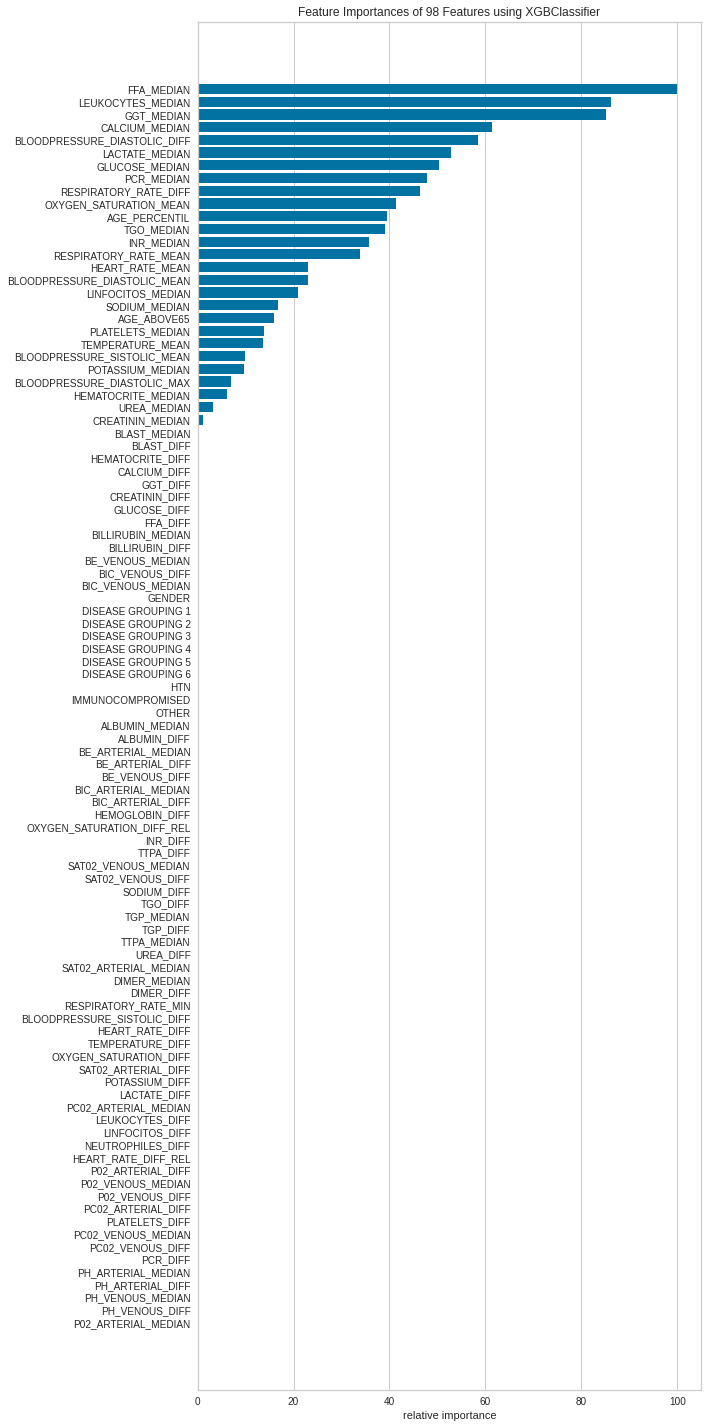

In [60]:
feature_importances(dados, modelo_xgboost)

Neste modelo, as cinco *features* com maior importância foram:

- FFA_MEDIAN
- LEUKOCYTES_MEDIAN
- GGT_PERCENTIL
- CALCIUM_MEDIAN
- BLOODPRESSURE_DIASTOLIC_DIFF

Agora, vamos analisar qual é a acurácia do modelo, ou seja, o quanto ele está acertando:


In [61]:
acuracia(dados, modelo_xgboost)

A acurácia do Modelo é de: 83.10 %


O modelo apresentou uma acurácia razoavelmente boa, mas precisamos analisar com mais detalhes através da matriz de confusão:

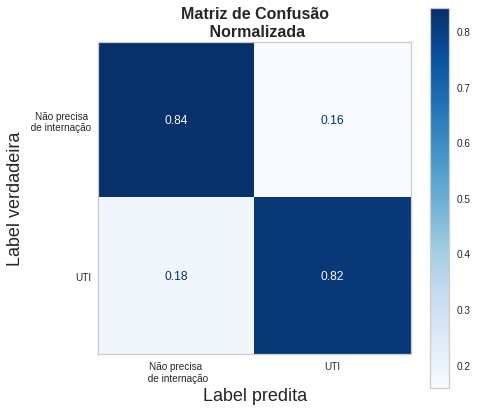

In [65]:
confusion_matrix(dados, modelo_xgboost)

VP = 0.82 - Verdadeiro positivo (label=1 e predição=1)

VN = 0.84 - Verdadeiro negativo (quando a pessoa não precisa ir para UTI: label=0 e predição=0)

FP = 0.16 - Falso positivo (label=0 e predição=1)

FN = 0.18 - Falso negativo (label=1 e predição=1)

O modelo gerado pelo **XGBClassifier** teve um acerto de **0.82** para pacientes que devem ser internados na UTI (**verdadeiro positivo**) e de **0.84** para pacientes que não devem ser internados (**verdadeiro negativo**).

Além disso, o modelo teve **0.16** para pacientes que devem ser internados, mas que na realidade não deveriam ser internados (**falso positivo**) e **0.18** para pacientes que não deveriam ser internados, sendo que necessitavam de internação (**falso negativo**).

Com base nisso, podemos aprofundar mais as nossas métricas, através da acurácia, precisão, recall e f1 score. Utilizando o *Classification Report* e passando os dados y_test e predição, temos:


In [79]:
roda_modelo(dados, modelo_xgboost)

AUC 0.8301435406698565

Classification Report

              precision    recall  f1-score   support

           0       0.73      0.87      0.80        38
           1       0.81      0.64      0.71        33

    accuracy                           0.76        71
   macro avg       0.77      0.75      0.75        71
weighted avg       0.77      0.76      0.76        71



Para valores iguais a 0 (pacientes que não precisam de UTI), possuimos uma precisão de 73% e para valores igual a 1 (pacientes que precisam de UTI) a precisão é de 81%. 

O *Recall* apresentou um desempenho ótimo para valores iguais a 0 , porém apenas 64% para valores iguais a 1. 

O *F1 score* nos mostra uma média harmônica entre precisão e recall. Para 0, apresentou 80% e para 1 apresentou 71%.

Outra métrica importante é a Curva ROC AUC como mostra o gráfico abaixo:

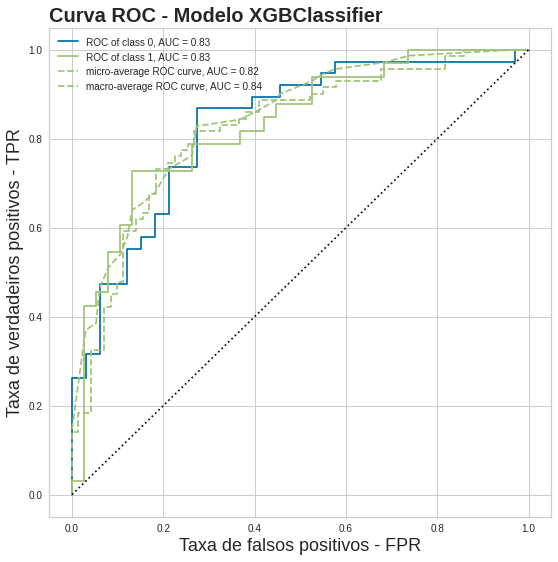

In [74]:
plotar_roc_auc(dados, modelo_xgboost)

Uma regra geral é que o gráfico de ROC deve ter uma protuberância em direção ao canto superior esquerdo. Um traçado que esteja à esquerda e acima de outro sinaliza um desempenho melhor, como é o caso do gráfico acima.

O valor AUC ficou em 0.83, que pode ser considerado um bom desempenho, pois quanto mais próximo de 1, melhor o modelo é.

Para finalizar a avaliação deste modelo, vou fazer o *Cross-Validation*:

In [20]:
roda_modelo_cv(dados, modelo_xgboost,5,10)

AUC Médio 0.7908160642700116 Intervalo 0.7152903597732783 - 0.866341768766745


Quando é feito o cálculo do AUC médio, que levamos em consideração o desvio padrão, n vezes, a fim de evitar a aleatoriedade dos dados e aumentar a chance do resultado estar dentro da realidade. Neste modelo o AUC médio está apresentando um bom desempenho.

<a name="extra"></a>
###**ExtraTreesClassifier**

Esta classe implementa um metaestimador que ajusta um número de árvores de decisão aleatórias (também conhecidas como árvores extras) em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e o sobreajuste do controle.


 
Definindo a variável do modelo:


In [22]:
modelo_extra_trees = ExtraTreesClassifier()

Analisando as *features* que o modelo está dando maior importância:

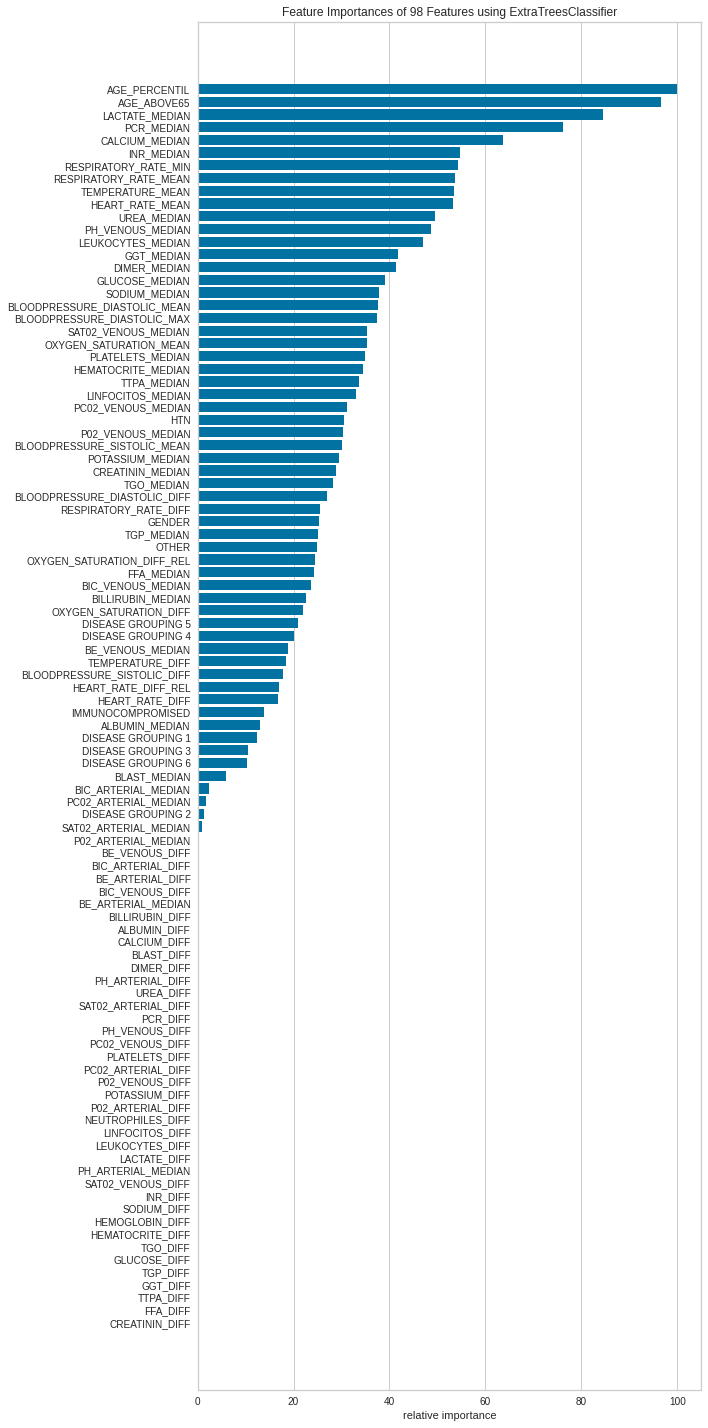

In [82]:
feature_importances(dados, modelo_extra_trees)

Neste modelo, as cinco *features* com maior importância foram:
 
- AGE_PERCENTIL
- ABOVE_65
- LACTATE_MEDIAN
- PCR_MEDIAN
- CALCIUM_MEDIAN

Agora, vamos analisar qual é a acurácia do modelo, ou seja, o quanto ele está acertando:

In [83]:
acuracia(dados, modelo_extra_trees)

A acurácia do Modelo é de: 81.69 %


O modelo apresentou uma acurácia razoavelmente boa, mas precisamos analisar com mais detalhes através da matriz de confusão:

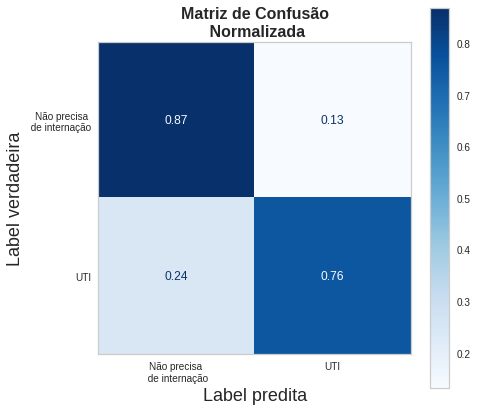

In [84]:
confusion_matrix(dados, modelo_extra_trees)

VP = 0.76 - Verdadeiro positivo (label=1 e predição=1)
 
VN = 0.87 - Verdadeiro negativo (quando a pessoa não precisa ir para UTI: label=0 e predição=0)
 
FP = 0.13 - Falso positivo (label=0 e predição=1)
 
FN = 0.24 - Falso negativo (label=1 e predição=1)
 
O modelo gerado pelo **ExtraTreesClassifier** teve um acerto de **0.76** para pacientes que devem ser internados na UTI (**verdadeiro positivo**) e de **0.87** para pacientes que não devem ser internados (**verdadeiro negativo**). Portanto, esse modelo está lidando melhor para predizer quem não deve ser internado.
 
Além disso, o modelo teve **0.13** para pacientes que devem ser internados, mas que na realidade não deveriam ser internados (**falso positivo**) e **0.24** para pacientes que não deveriam ser internados, sendo que necessitavam de internação (**falso negativo**). Esse resultado não é bom, pois o falso negativo é péssimo nessa situação de saúde, onde um paciente que deveria estar na UTI é mandando para casa, podendo entrar em risco por não receber os cuidados médicos necessários.
 
Com base nisso, podemos aprofundar mais as nossas métricas, através da acurácia, precisão, recall e f1 score. Utilizando o *Classification Report* e passando os dados y_test e predição, temos:

In [86]:
roda_modelo(dados, modelo_extra_trees)

AUC 0.7655502392344498

Classification Report

              precision    recall  f1-score   support

           0       0.66      0.82      0.73        38
           1       0.71      0.52      0.60        33

    accuracy                           0.68        71
   macro avg       0.68      0.67      0.66        71
weighted avg       0.68      0.68      0.67        71



Para valores iguais a 0 (pacientes que não precisam de UTI), possuímos uma precisão apenas de 66% e para valores igual a 1 (pacientes que precisam de UTI) a precisão é de 71%. 
 
O *Recall* apresentou um desempenho ótimo de 82% para valores iguais a 0 , porém apenas 52% para valores iguais a 1. 
No caso desse projeto os falsos negativos são considerados mais prejudicionais que os falsos positivos. Portanto, é necessário um *recall* com maior sensibilidade.
 
O *F1 score* nos mostra uma média harmônica entre precisão e recall. Para 0, apresentou 73% e para 1 apresentou 60%.
 
Outra métrica importante é a Curva ROC AUC como mostra o gráfico abaixo:


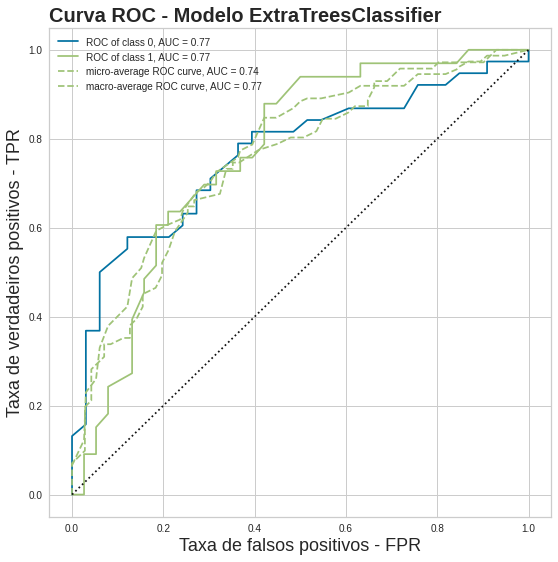

In [87]:
plotar_roc_auc(dados, modelo_extra_trees)

O esperado em um bom desempenho, é que o valor de AUC seja próximo de 1 e que a curva ROC esteja próxima ao canto superior esquerdo e vemos que nesse modelo a curva ROC não está perto do que seria ótimo.

Para finalizar a avaliação deste modelo, vou fazer o *Cross-Validation*:

In [24]:
roda_modelo_cv(dados, modelo_extra_trees,5,10)

AUC Médio 0.7904668035260142 Intervalo 0.6887172058129909 - 0.8922164012390374


O AUC médio está apresentando um bom desempenho.

<a name="logistic"></a>
###**LogisticRegression**

Classificador de regressão logística.

A regressão logística é um algoritmo de classificação usado para atribuir observações a um conjunto discreto de classes.



 
Definindo a variável do modelo:


In [25]:
modelo_regression = LogisticRegression()

 Analisando as *features* que o modelo está dando maior importância:

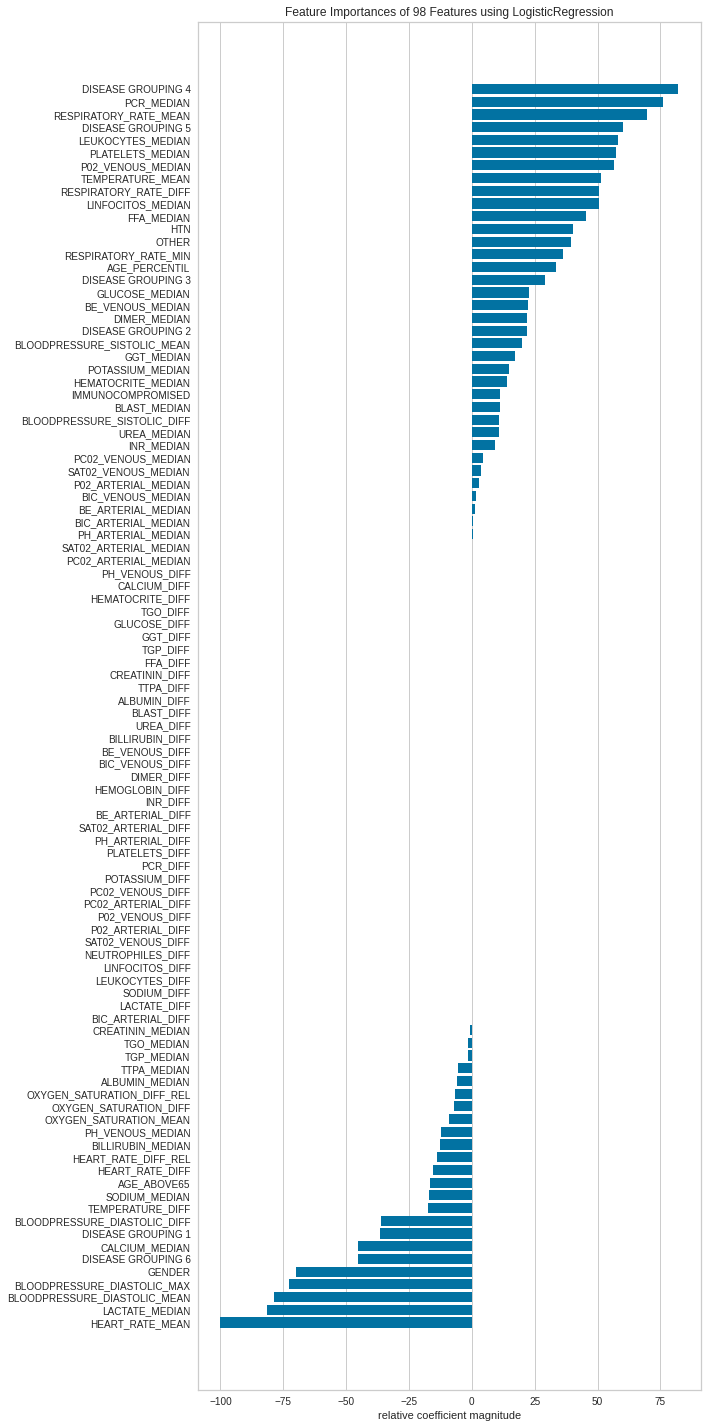

In [91]:
feature_importances(dados, modelo_regression)

Neste modelo, as cinco *features* com maior importância foram:
 
- DISEASE GROUPING 4
- PCR_MEDIAN
- RESPIRATORY_RATE_MEAN
- DISEASE GROUPING 5
- LEUKOCYTES_MEDIAN
 
Agora, vamos analisar qual é a acurácia do modelo, ou seja, o quanto ele está acertando:


In [92]:
 acuracia(dados, modelo_regression)

A acurácia do Modelo é de: 83.10 %


O modelo apresentou uma boa acurácia, mas precisamos analisar com mais detalhes através da matriz de confusão:

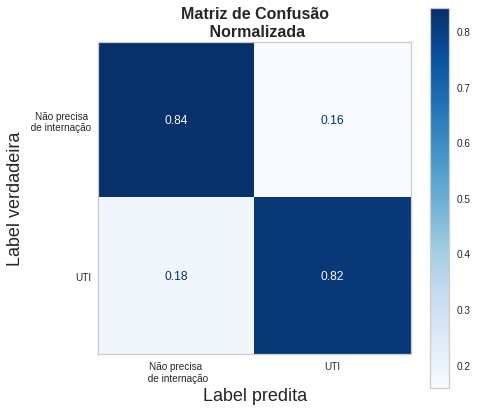

In [93]:
confusion_matrix(dados, modelo_regression)

O esse modelo apresentou o mesmo resultado que o **XGBClassifier**: teve um acerto de **0.82** para pacientes que devem ser internados na UTI (**verdadeiro positivo**) e de **0.84** para pacientes que não devem ser internados (**verdadeiro negativo**).
 
Além disso, o modelo teve **0.16** para pacientes que devem ser internados, mas que na realidade não deveriam ser internados (**falso positivo**) e **0.18** para pacientes que não deveriam ser internados, sendo que necessitavam de internação (**falso negativo**).
 
Com base nisso, podemos aprofundar mais as nossas métricas, através da acurácia, precisão, recall e f1 score. Utilizando o *Classification Report* e passando os dados y_test e predição, temos:

In [94]:
roda_modelo(dados, modelo_regression)

AUC 0.7647527910685805

Classification Report

              precision    recall  f1-score   support

           0       0.68      0.79      0.73        38
           1       0.70      0.58      0.63        33

    accuracy                           0.69        71
   macro avg       0.69      0.68      0.68        71
weighted avg       0.69      0.69      0.69        71



 Porém, quando olhamos para os valores das métricas, para valores igual a 0 (pacientes que não precisam de UTI), possuímos uma precisão de 68% e para valores igual a 1 (pacientes que precisam de UTI) a precisão é de 70%. 
 
O *Recall* apresentou um desempenho de 79% para valores iguais a 0, porém apenas 58% para valores iguais a 1. 
 
O *F1 score* nos mostra uma média harmônica entre precisão e recall. Para 0, apresentou 73% e para 1 apresentou 63%.

Outra métrica importante é a Curva ROC AUC como mostra o gráfico abaixo:


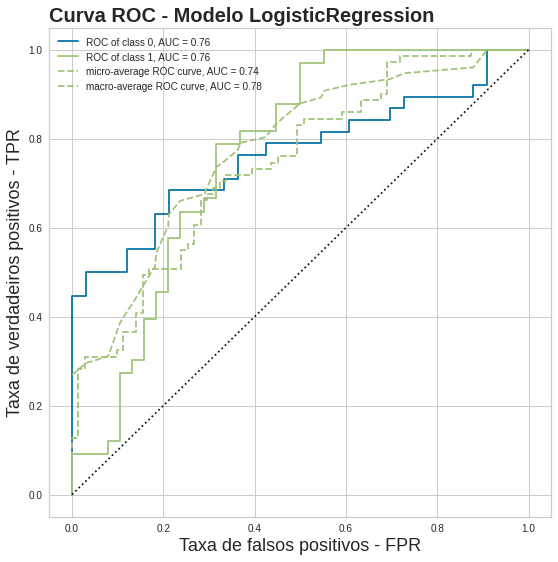

In [95]:
plotar_roc_auc(dados, modelo_regression)

O valor de AUC desse modelo também não foi tão bom quanto o valor observado no modelo XGBClassifier.

Para finalizar a avaliação deste modelo, vou fazer o *Cross-Validation*:

In [27]:
roda_modelo_cv(dados, modelo_regression,5,10)

AUC Médio 0.770990600349153 Intervalo 0.6757306004522704 - 0.8662506002460356


O AUC médio desse modelo foi o pior observado até o momento, sendo de 0.77.

<a name="forest"></a>
###**RandomForestClassifier**

Uma "floresta aleatória" é um metaestimador que ajusta vários classificadores de árvore de decisão em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e o sobreajuste de controle. O tamanho da subamostra é controlado com o parâmetro `max_samples` se o `bootstrap = True `(padrão), caso contrário, todo o conjunto de dados é usado para construir cada árvore.

Definindo a variável do modelo:

In [28]:
modelo_random_forest = RandomForestClassifier()

 Analisando as *features* que o modelo está dando maior importância:

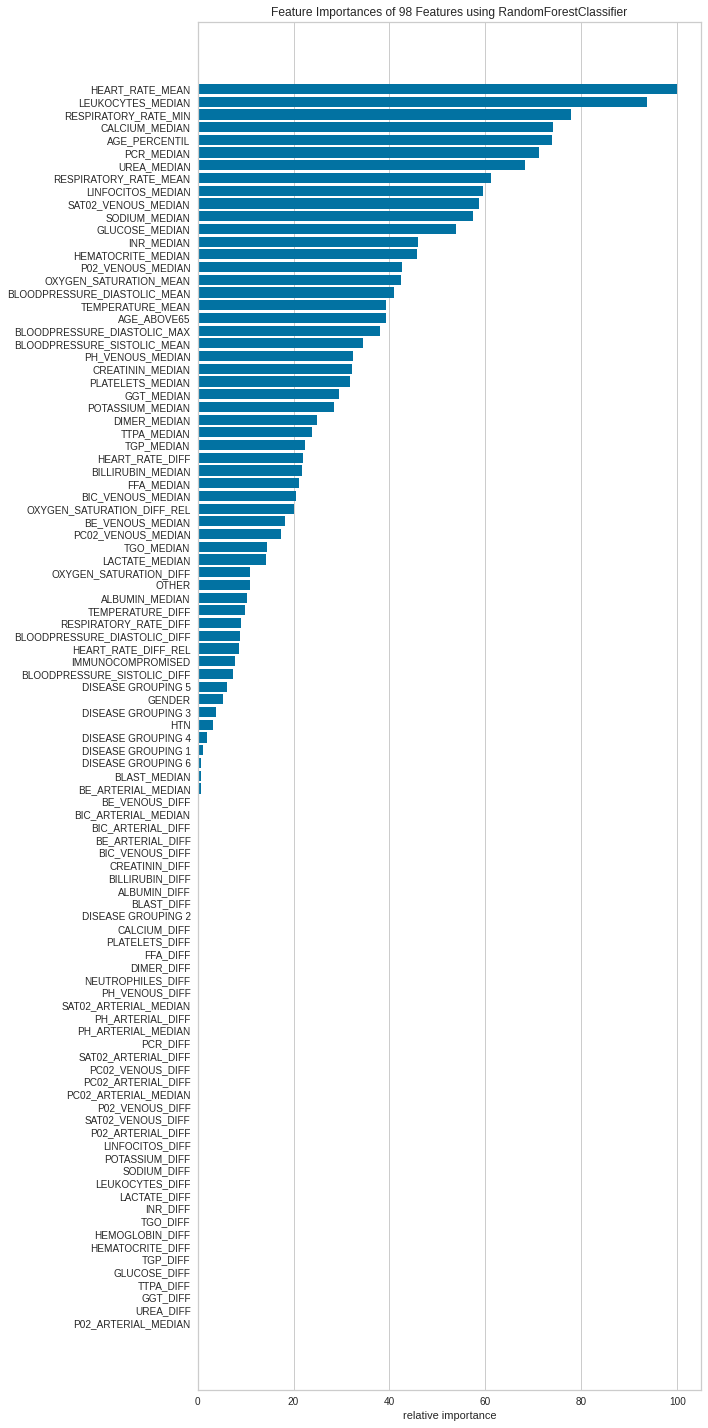

In [98]:
feature_importances(dados, modelo_random_forest)

Neste modelo, as cinco *features* com maior importância foram:
 
- HEART_RATE_MEAN
- LEUKOCYTES_MEDIAN
- RESPIRATORY_RATE_MIN
- CALCIUM_MEDIAN
- AGE_PERCENTIL
 
Agora, vamos analisar qual é a acurácia do modelo, ou seja, o quanto ele está acertando:


In [99]:
acuracia(dados, modelo_random_forest)

A acurácia do Modelo é de: 80.28 %


O modelo apresentou uma acurácia razoavelmente boa, mas precisamos analisar com mais detalhes através da matriz de confusão:


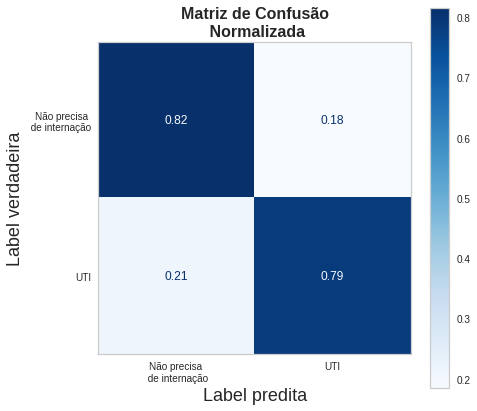

In [100]:
confusion_matrix(dados, modelo_random_forest)

O modelo gerado pelo **RandomForestClassifier** teve um acerto de **0.79** para pacientes que devem ser internados na UTI (**verdadeiro positivo**) e de **0.82** para pacientes que não devem ser internados (**verdadeiro negativo**).
 
Além disso, o modelo teve **0.18** para pacientes que devem ser internados, mas que na realidade não deveriam ser internados (**falso positivo**) e **0.21** para pacientes que não deveriam ser internados, sendo que necessitavam de internação (**falso negativo**).
 
Com base nisso, podemos aprofundar mais as nossas métricas, através da acurácia, precisão, recall e f1 score. Utilizando o *Classification Report* e passando os dados y_test e predição, temos:

In [101]:
roda_modelo(dados, modelo_random_forest)

AUC 0.8177830940988836

Classification Report

              precision    recall  f1-score   support

           0       0.76      0.82      0.78        38
           1       0.77      0.70      0.73        33

    accuracy                           0.76        71
   macro avg       0.76      0.76      0.76        71
weighted avg       0.76      0.76      0.76        71



Para valores igual a 0 (pacientes que não precisam de UTI), possuímos uma precisão de 76% e para valores igual a 1 (pacientes que precisam de UTI) a precisão é de 77%. 
 
O *Recall* apresentou um desempenho ótimo de 82% para valores iguais a 0 e 70% para valores iguais a 1, sendo o modelo com melhores valores de *recall* para label 1 até o momento.
 
O *F1 score* nos mostra uma média harmônica entre precisão e recall. Para 0, apresentou 78% e para 1 apresentou 73%.
 
Outra métrica importante é a Curva ROC AUC como mostra o gráfico abaixo:


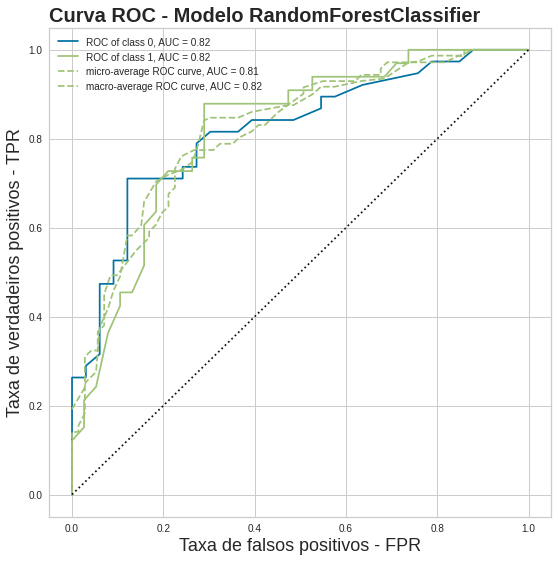

In [102]:
plotar_roc_auc(dados, modelo_random_forest)

o valor de AUC está bom, apresentando 0.82 e a curva ROC está razoavelmente boa.
 
Para finalizar a avaliação deste modelo, vou fazer o *Cross-Validation*:

In [29]:
roda_modelo_cv(dados, modelo_random_forest,5,10)

AUC Médio 0.8051705825143327 Intervalo 0.7185658143318363 - 0.8917753506968291


Esse modelo foi o que apresentou melhor valor de ACU médio após o *Cross-validation*. 

<a name="features"></a>
## **Testando as melhores features com Featurewiz**

Para recapitular como está a situação dos modelos até aqui, temos essa tabela abaixo, que mostra os valores de acurácia, AUC e *precision/recall* para cada uma das *labels*:


|Modelo| Acurácia|AUC|Precision 0|Precision 1|Recall 0|Recall 1|
|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|
|XGBClassifier    | 83.10% | 0.83 | 0.73 | 0.81 | 0.87 | 0.64 |
| ExtraTreesClassifier    |  81.69%  | 0.77 | 0.66 | 0.71 | 0.82 | 0.52 |
| LogisticRegression    | 83.10%  | 0.76 | 0.68 | 0.70 | 0.79 | 0.58 |
| RandomForestClassifier    | 80.28%  | 0.82 | 0.76 | 0.77 | 0.82 | 0.70 |

Como podemos ver os **melhores modelos foram o XGBClassifier e o RandomForestClassifier**. No caso do **XGBClassifier temos os valores melhores para acurácia, AUC, *Precision* para label 1 e recall para o label 0**. 

Enquanto issso, no **RandomForestClassifier temos melhores valores de *Precision* na label 0 e *Recall* na label 1**.


Em relação ao **Cross-Validation**, o modelo **RandomForestClassifier** tem melhores resultados:

**XGBClassifier:** 
- AUC Médio 0.7908160642700116
- Intervalo 0.7152903597732783 - 0.866341768766745

**RandomForestClassifier**
- AUC Médio 0.8051705825143327
- Intervalo 0.7185658143318363 - 0.8917753506968291

Agora, vou tentar usar a biblioteca `featurewiz` para ver se selecionando os melhores features é possível aprimorar as métricas nestes modelos:




Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
Shape of your Data Set loaded: (352, 99)
Loading test data...
    Filename is an empty string or file not able to be loaded
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    98 Predictors classified...
        36 variable(s) will be ignored since they are ID or low-information variables
GPU active on this device
    Running XGBoost using GPU parameters
Removing 36 columns from further processing since ID or low information variables
    columns removed: ['ALBUMIN_DIFF', 'BE_ARTERIAL_DIFF', 'BE_VENOUS_DIFF', 'BIC_ARTERIAL_DIFF', 'BIC_VENOUS_DIFF', 'BILLIRUBIN_DIFF', 'BLAST_DIFF', 'CALCIUM_DIFF', 'CREATININ_DIFF', 'FFA_DIFF', 'GGT_DIFF', 'GLUCOSE_DIFF', 'HEMATOCRITE_DIFF', 'HEMOGLOBIN_DIFF', 'INR_DIFF', 'LACTATE_DIFF', 'LEUKOCYTES_DIFF', 'LINFOCITOS_DIFF', 'NEUTROP

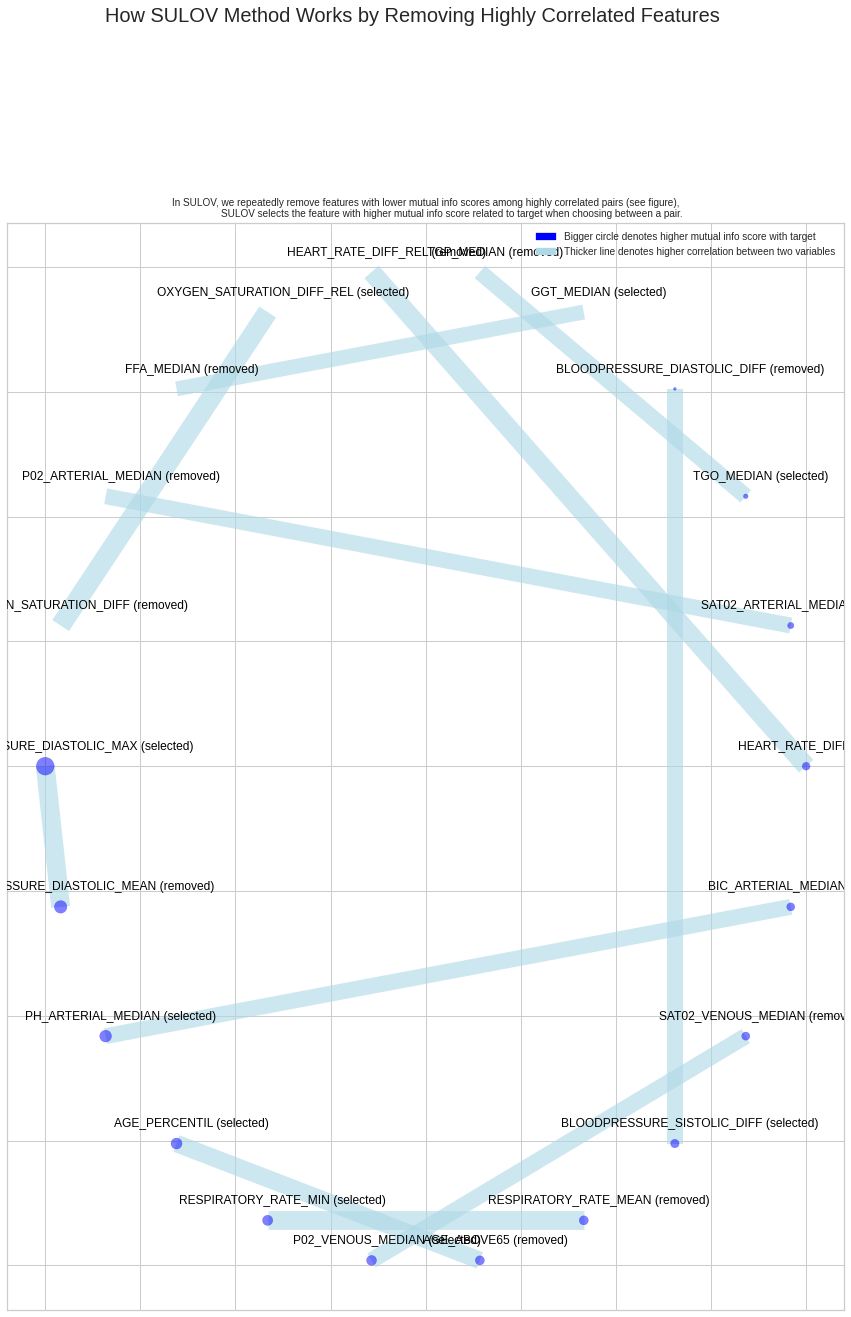

    Adding 0 categorical variables to reduced numeric variables  of 51
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 51 
    Finding Important Features using Boosted Trees algorithm...
        using 51 variables...
        using 41 variables...
        using 31 variables...
        using 21 variables...
        using 11 variables...
        using 1 variables...
Selected 17 important features from your dataset
    Time taken (in seconds) = 2
Returning list of 17 important features and dataframe.


In [12]:
features = featurewiz(dados, target='ICU', corr_limit=0.70, verbose=2)

Verificando quais features foram selecionadas: 

In [13]:
features

(['PCR_MEDIAN',
  'UREA_MEDIAN',
  'AGE_PERCENTIL',
  'HTN',
  'GLUCOSE_MEDIAN',
  'SODIUM_MEDIAN',
  'PH_VENOUS_MEDIAN',
  'OXYGEN_SATURATION_MEAN',
  'LACTATE_MEDIAN',
  'BLOODPRESSURE_SISTOLIC_DIFF',
  'TEMPERATURE_DIFF',
  'BLOODPRESSURE_DIASTOLIC_MAX',
  'P02_VENOUS_MEDIAN',
  'RESPIRATORY_RATE_MIN',
  'GGT_MEDIAN',
  'TGO_MEDIAN',
  'OXYGEN_SATURATION_DIFF_REL'],
      PCR_MEDIAN  UREA_MEDIAN  ...  OXYGEN_SATURATION_DIFF_REL  ICU
 0         -0.88        -0.84  ...                       -1.00    1
 1         -0.94        -0.84  ...                       -0.96    1
 2         -0.50        -0.94  ...                       -1.00    0
 3         -0.99        -0.90  ...                       -0.98    0
 4         -1.00        -0.88  ...                       -0.98    0
 ..          ...          ...  ...                         ...  ...
 347       -0.57        -0.86  ...                       -1.00    1
 348       -0.99        -0.86  ...                       -1.00    0
 349       -0.03

Criando um DataFrame com as *features* selecionadas: 

In [22]:
dados_features = dados[['PCR_MEDIAN',
  'UREA_MEDIAN',
  'AGE_PERCENTIL',
  'HTN',
  'GLUCOSE_MEDIAN',
  'SODIUM_MEDIAN',
  'PH_VENOUS_MEDIAN',
  'OXYGEN_SATURATION_MEAN',
  'LACTATE_MEDIAN',
  'BLOODPRESSURE_SISTOLIC_DIFF',
  'TEMPERATURE_DIFF',
  'BLOODPRESSURE_DIASTOLIC_MAX',
  'P02_VENOUS_MEDIAN',
  'RESPIRATORY_RATE_MIN',
  'GGT_MEDIAN',
  'TGO_MEDIAN',
  'OXYGEN_SATURATION_DIFF_REL', 'ICU']]

In [23]:
dados_features.head()

,PCR_MEDIAN,UREA_MEDIAN,AGE_PERCENTIL,HTN,GLUCOSE_MEDIAN,SODIUM_MEDIAN,PH_VENOUS_MEDIAN,OXYGEN_SATURATION_MEAN,LACTATE_MEDIAN,BLOODPRESSURE_SISTOLIC_DIFF,TEMPERATURE_DIFF,BLOODPRESSURE_DIASTOLIC_MAX,P02_VENOUS_MEDIAN,RESPIRATORY_RATE_MIN,GGT_MEDIAN,TGO_MEDIAN,OXYGEN_SATURATION_DIFF_REL,ICU
0,-0.88,-0.84,5,0.00,-0.89,-0.03,0.36,0.74,1.00,-1.00,-1.00,-0.25,-0.70,-0.50,-0.95,-1.00,-1.00,1
1,-0.94,-0.84,0,0.00,-0.78,0.09,0.36,0.94,1.00,-0.53,-1.00,-0.44,-0.70,-0.71,-0.96,-1.00,-0.96,1
2,-0.50,-0.94,3,0.00,-0.89,0.20,0.36,0.68,-0.83,-1.00,-1.00,-0.30,-0.63,-0.36,-0.32,-0.99,-1.00,0
3,-0.99,-0.90,0,0.00,-0.85,0.14,0.36,0.87,1.00,-0.88,-0.95,-0.08,-0.70,-0.57,-0.94,-1.00,-0.98,0
4,-1.00,-0.88,0,0.00,-0.89,0.09,0.36,0.82,1.00,-0.75,-0.98,-0.25,-0.70,-0.43,-0.96,-1.00,-0.98,0


###**XGBClassifier com features do Featurewiz**

In [24]:
acuracia(dados_features, modelo_xgboost)

A acurácia do Modelo é de: 78.87 %


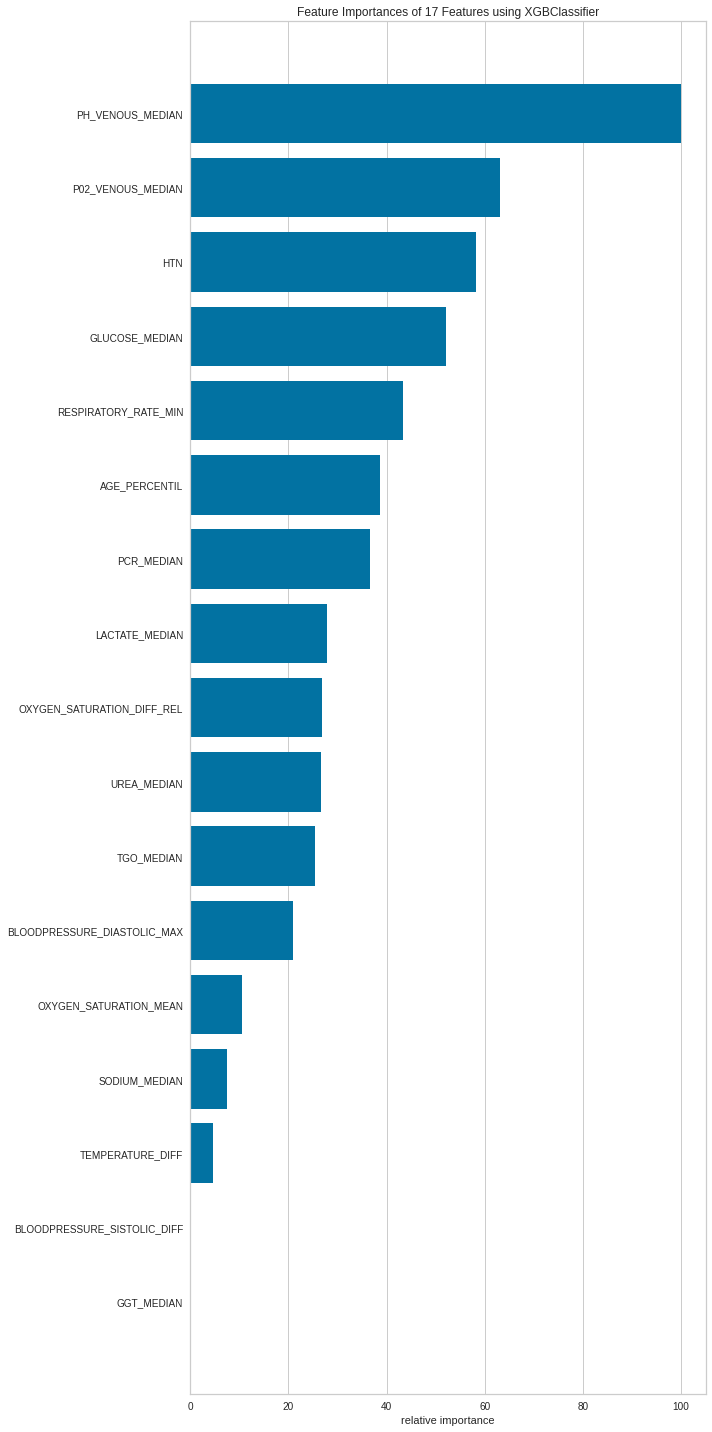

In [28]:
feature_importances(dados_features, modelo_xgboost)

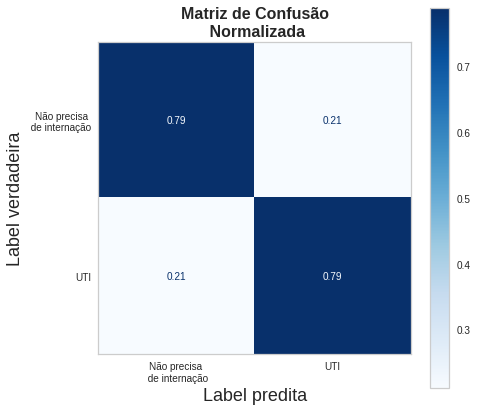

In [29]:
confusion_matrix(dados_features, modelo_xgboost)

In [30]:
roda_modelo(dados_features, modelo_xgboost)

AUC 0.7854864433811802

Classification Report

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        38
           1       0.80      0.73      0.76        33

    accuracy                           0.79        71
   macro avg       0.79      0.78      0.79        71
weighted avg       0.79      0.79      0.79        71



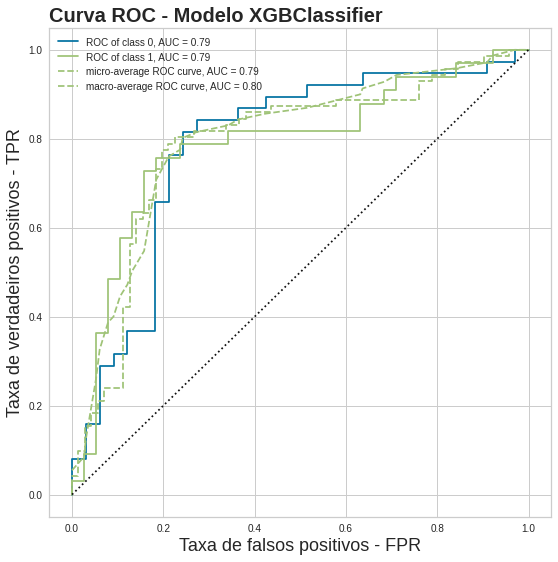

In [32]:
plotar_roc_auc(dados_features, modelo_xgboost)

In [31]:
roda_modelo_cv(dados_features, modelo_xgboost,5,10)

AUC Médio 0.7716335968145178 Intervalo 0.6888994708271989 - 0.8543677228018367


###**RandomForestClassifier com features do Featurewiz**

In [25]:
acuracia(dados_features, modelo_random_forest)

A acurácia do Modelo é de: 78.87 %


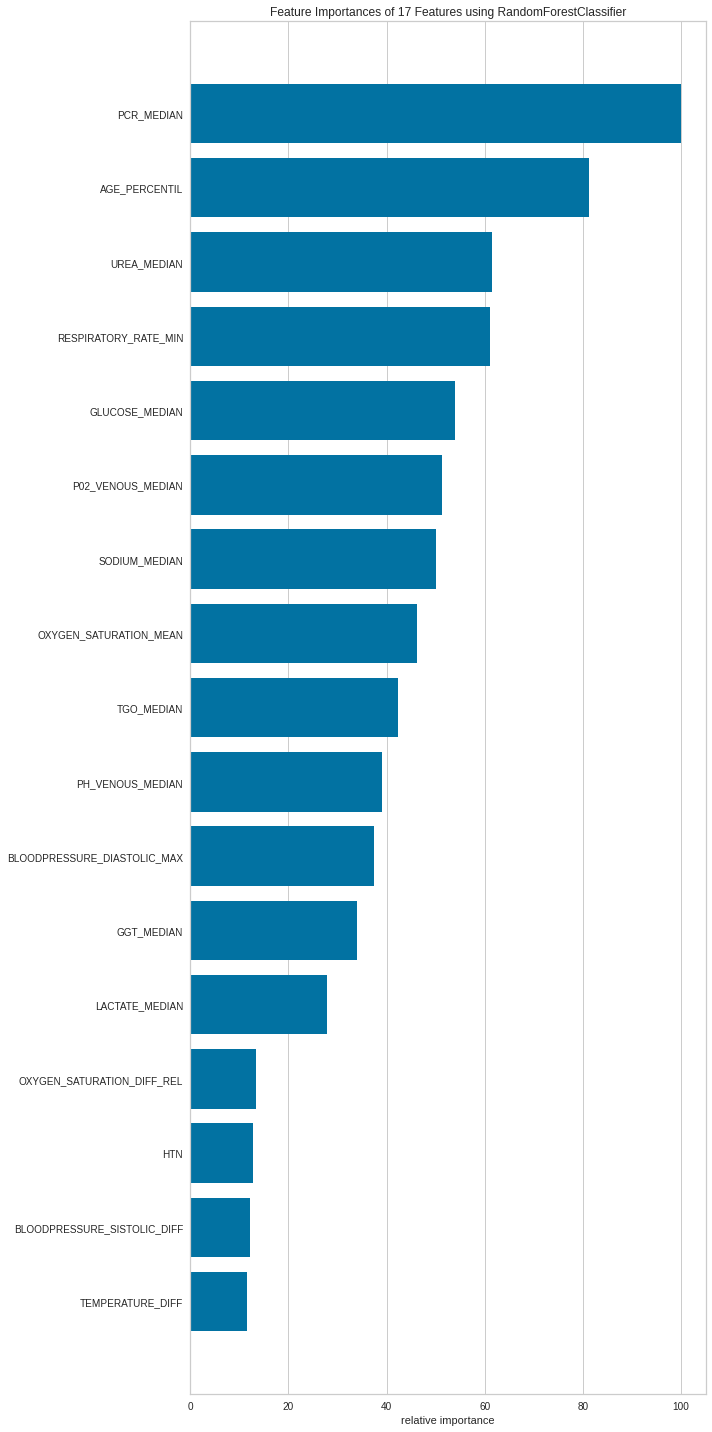

In [34]:
feature_importances(dados_features, modelo_random_forest)

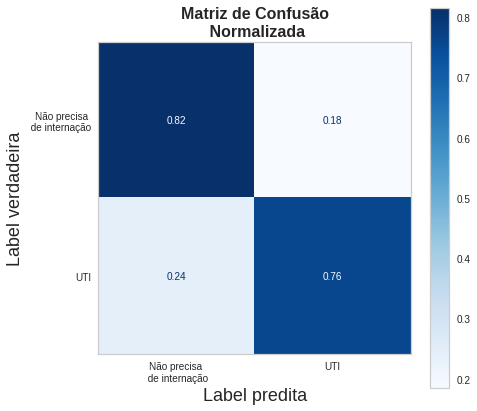

In [35]:
confusion_matrix(dados_features, modelo_random_forest)

In [36]:
roda_modelo(dados_features, modelo_random_forest)

AUC 0.7850877192982456

Classification Report

              precision    recall  f1-score   support

           0       0.76      0.82      0.78        38
           1       0.77      0.70      0.73        33

    accuracy                           0.76        71
   macro avg       0.76      0.76      0.76        71
weighted avg       0.76      0.76      0.76        71



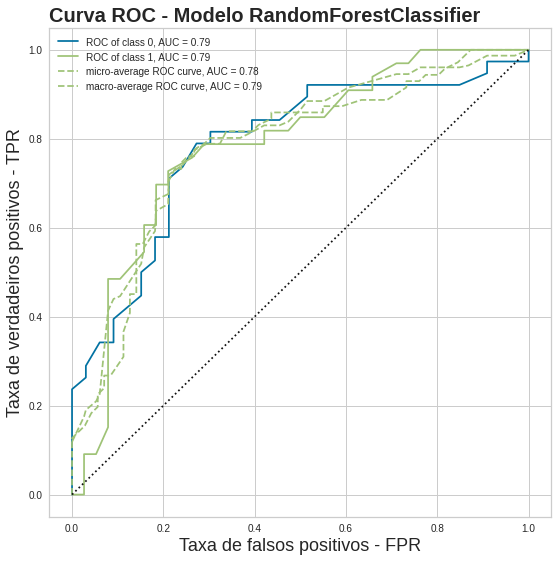

In [37]:
plotar_roc_auc(dados_features, modelo_random_forest)

In [39]:
roda_modelo_cv(dados_features, modelo_random_forest,5,10)

AUC Médio 0.805622002834174 Intervalo 0.7119722073382262 - 0.8992717983301217


##**Os modelos melhoraram após a seleção de features?**

####**Antes** da seleção de Features:



|Modelo| Acurácia|AUC|Precision 0|Precision 1|Recall 0|Recall 1|
|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|
|XGBClassifier    | 83.10% | 0.83 | 0.73 | 0.81 | 0.87 | 0.64 |
| RandomForestClassifier    | 80.28%  | 0.82 | 0.76 | 0.77 | 0.82 | 0.70 |
 

 
####**Após** a seleção de Features:


|Modelo| Acurácia|AUC|Precision 0|Precision 1|Recall 0|Recall 1|
|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|
|XGBClassifier    | 78.87 % | 0.79 | 0.78 | 0.80 | 0.84 | 0.73 |
| RandomForestClassifier    | 78.87 %  | 0.79| 0.76 | 0.77 | 0.82 | 0.70 |


Comparação entre os resultados do *Cross-Validation*:

**XGBClassifier**
- AUC Médio 0.7716335968145178 
- Intervalo 0.6888994708271989 - 0.8543677228018367
>*Antes da seleção de features:*
>
>*AUC Médio 0.7908160642700116*
>
>*Intervalo 0.7152903597732783 - 0.866341768766745*


**RandomForestClassifier**
- AUC Médio 0.805622002834174 
- Intervalo 0.7119722073382262 - 0.8992717983301217
>*Antes da seleção de features:*
>
>*AUC Médio 0.8051705825143327*
>
>*Intervalo 0.7185658143318363 - 0.8917753506968291*

Após comparar esses resultados vemos que **selecionar apenas algumas features não trouxe grandes melhoras**. 

**Os valores de acurácia e AUC caíram em ambos os modelos**. Houve alguma **melhora nas métricas de *precision* no XGBClassifier para a label 0 e no *recall* da label 1**. Já no modelo **RandomForestClassifier todas as métricas de *precision* e *recall* permaneceram iguais**. 

Quando avaliamos os resultados de ***Cross-Validation* vemos que em ambos os modelos os valores tiveram uma pequena queda**.

Portanto, vou tentar buscar os hiperparâmetros através do **GridSearchCV**, utilizando o DataFrame original (antes da seleção das *features*).


<a name="hiper"></a>
##**Testes nos Hiperparâmetros com GridSearchCV**

O GridSearchCV gera um *output* com os melhores hiperparâmetros a partir de valores de parâmetro especificados em um dicionário.

> Hiperparâmetros são parâmetros que não são aprendidos diretamente nos estimadores. 
>
> No scikit-learn, eles são passados como argumentos para o construtor das classes do estimador.



###**XGBClassifier**

In [80]:
#Definindo os valores dos parâmetros que serão testados
parametros_xgb = {
        'min_child_weight': [1, 5, 10], 
        #Minimum sum of instance weight (hessian) needed in a child. The larger min_child_weight is, the more conservative the algorithm will be.
        'gamma': [0.5, 1, 1.5, 2, 5],
        #Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
        'subsample': [0.6, 0.8, 1.0],
        #Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. 
        'colsample_bytree': [0.6, 0.8, 1.0], #This is a family of parameters for subsampling of columns.
        'max_depth': [3, 4, 5] #The maximum depth of the tree.
        }
#Criação do modelo
modelo_xgb = XGBClassifier(random_state=0)

Buscando os melhores parâmetros com o GridSearchCV:

In [81]:
grid_search_cv(parametros_xgb, modelo_xgb, x_train, y_train)

{'colsample_bytree': 0.6,
 'gamma': 1,
 'max_depth': 4,
 'min_child_weight': 1,
 'subsample': 1.0}

Testando os hiperparâmetros selecionados pelo `GridSearchCV`:

- colsample_bytree: 0.6
- gamma: 1
- max_depth: 4
- min_child_weight: 1
- subsample: 1.0

In [139]:
xgb_1 = XGBClassifier(colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=1, subsample = 1.0)

Análise da acurácia:

In [140]:
acuracia(dados,xgb_1)

A acurácia do Modelo é de: 77.46 %


A acurácia caiu após adicionar esses hiperparâmetros!

Matriz de Confusão:

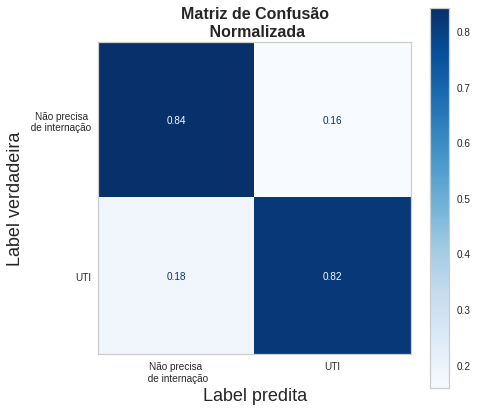

In [154]:
confusion_matrix(dados, xgb_1)

A matriz de confusão continuou da mesma forma que o modelo sem alteração de hiperparâmetros.

Análise do *Classification report*:

In [147]:
roda_modelo(dados, xgb_1)

AUC 0.8405103668261563

Classification Report

              precision    recall  f1-score   support

           0       0.79      0.87      0.82        38
           1       0.83      0.73      0.77        33

    accuracy                           0.80        71
   macro avg       0.81      0.80      0.80        71
weighted avg       0.81      0.80      0.80        71



Houve melhoria na maioria na métrica de **Recall** para a *label* 1


Análise da curva ROC:

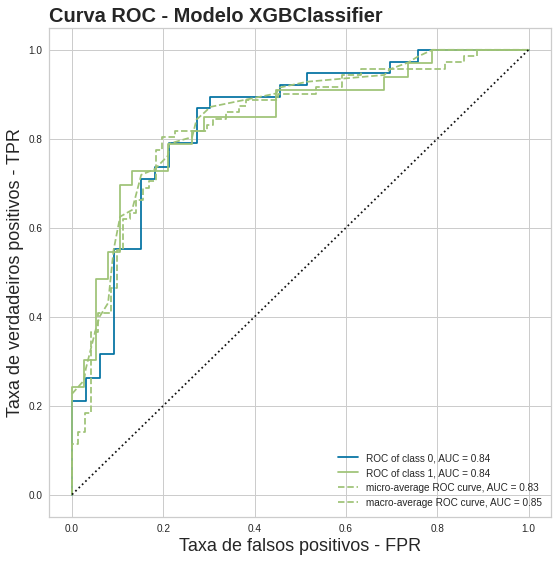

In [148]:
plotar_roc_auc(dados, xgb_1)

O valor de AUC aumentou para 0.84

Análise após o *Cross-validation*:

In [149]:
roda_modelo_cv(dados, xgb_1,5,10)

AUC Médio 0.7865989105133842 Intervalo 0.6938233082909175 - 0.8793745127358508


O valor de AUC médio teve uma pequena melhora.

**Na tentativa de uma melhoria:**

**Modificando: `max_depth=4` e adicionando `learning_rate=0.02`**:

> `learning_rate:` Após cada etapa de boosting, podemos obter diretamente os pesos dos novos recursos, e esse parâmetro reduz os pesos dos recursos para tornar o processo de boosting mais conservador.

In [145]:
xgb_2 = XGBClassifier(learning_rate=0.02, colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample = 1.0)

In [146]:
acuracia(dados,xgb_2)

A acurácia do Modelo é de: 83.10 %


Agora temos um valor de acurácia melhor!

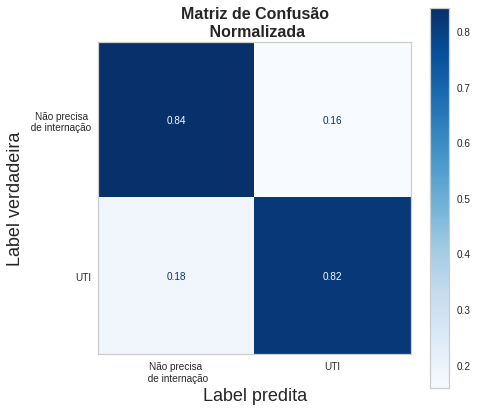

In [153]:
confusion_matrix(dados, xgb_2)

A matriz de confusão não sofreu alteração e permaneceu com os mesmos valores.

Análise do *Classification report*:

In [150]:
roda_modelo(dados, xgb_2)

AUC 0.8405103668261563

Classification Report

              precision    recall  f1-score   support

           0       0.79      0.87      0.82        38
           1       0.83      0.73      0.77        33

    accuracy                           0.80        71
   macro avg       0.81      0.80      0.80        71
weighted avg       0.81      0.80      0.80        71



Comparando com o modelo `xgb_2` vemos que não houve alteração nas métricas e a curva ROC também teve um bom desempenho, com AUC de 0.84:

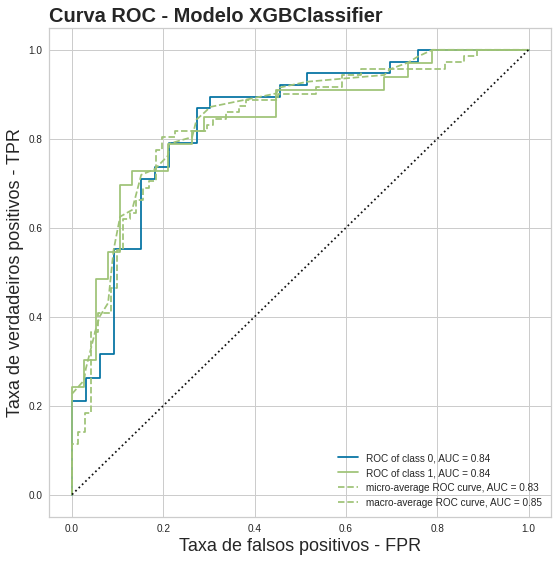

In [151]:
plotar_roc_auc(dados, xgb_2)

In [152]:
roda_modelo_cv(dados, xgb_2,5,10)

AUC Médio 0.7865989105133842 Intervalo 0.6938233082909175 - 0.8793745127358508


No caso desse modelo `xgb_2` houve a melhoria na acurácia, sendo o melhor modelo de XGBClassifier neste trabalho.

###**RandomForest**

In [45]:
#Definindo os valores dos parâmetros que serão testados
parametros_forest = {"n_estimators": [100, 200, 500], #The number of trees in the forest.
               "max_features": ["auto", "sqrt", "log2"], #The number of features to consider when looking for the best split
               "max_depth": [2, 3, 4, 5, 6], #The maximum depth of the tree.
               "bootstrap": ["True", "False"], #Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
               "oob_score": ["True", "False"], #Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.
               "criterion" :["gini", "entropy"]} #The function to measure the quality of a split. 

#Criação do modelo
modelo_forest = RandomForestClassifier(random_state=0)

Buscando os melhores parâmetros com o GridSearchCV:

In [50]:
grid_search_cv(parametros_forest, modelo_forest, x_train, y_train)

{'bootstrap': 'True',
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 100,
 'oob_score': 'True'}

Testando os hiperparâmetros selecionados pelo `GridSearchCV`:

- bootstrap: True
- criterion: gini
- max_depth: 5
- max_features: auto
- n_estimators: 100
- oob_score: True

In [162]:
random_1 =  RandomForestClassifier(n_estimators=100, max_features="auto", max_depth=5, 
                                    bootstrap=True, oob_score=True, criterion="gini", random_state=0)

In [163]:
acuracia(dados, random_1)

A acurácia do Modelo é de: 78.87 %


A acurácia caiu após adicionar esses hiperparâmetros!

Análise do *Classification report*:

In [164]:
roda_modelo(dados, random_1)

AUC 0.8277511961722488

Classification Report

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        38
           1       0.75      0.64      0.69        33

    accuracy                           0.73        71
   macro avg       0.74      0.73      0.73        71
weighted avg       0.73      0.73      0.73        71



A maioria das métricas caiu, exceto o *recall* da *label* 1, que teve uma melhora.



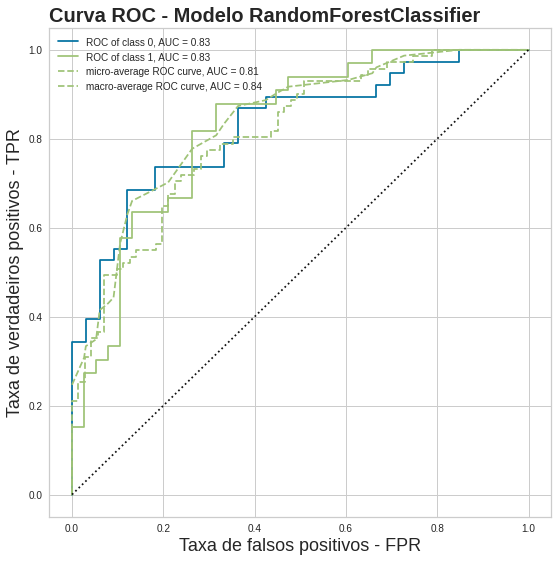

In [165]:
plotar_roc_auc(dados, random_1)

O valor de AUC aumentou para 0.83.

Análise após o *Cross-validation*:

In [166]:
roda_modelo_cv(dados, random_1,5,10)

AUC Médio 0.8026893939393941 Intervalo 0.7161108786958316 - 0.8892679091829566


O AUC médio praticamente não sofreu alteração.


**Na tentativa de uma melhoria:**

**Modificando: `n_estimators=50`**

In [167]:
random_2 = RandomForestClassifier(n_estimators=50, max_features="auto", max_depth=4, 
                                    bootstrap=True, oob_score=True, criterion="gini", random_state=0)

In [168]:
acuracia(dados, random_2)

A acurácia do Modelo é de: 74.65 %


Análise do *Classification report*:

In [169]:
roda_modelo(dados, random_2)

AUC 0.8205741626794258

Classification Report

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        38
           1       0.80      0.61      0.69        33

    accuracy                           0.75        71
   macro avg       0.76      0.74      0.74        71
weighted avg       0.76      0.75      0.74        71



Houve queda no *Precision* da *label* 1, *Recall* da *label* 0 e no *f1-score* da *label* 0.      

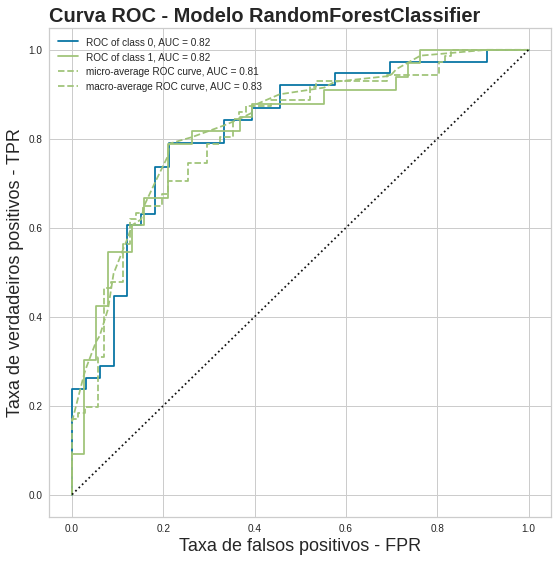

In [170]:
plotar_roc_auc(dados, random_2)

O valor de AUC permaneceu o mesmo (0.82).

Análise após o *Cross-validation*:

In [171]:
roda_modelo_cv(dados, random_2,5,10)

AUC Médio 0.8018461059743955 Intervalo 0.7106476217585739 - 0.8930445901902172


<a name="selecao"></a>
#**Seleção do Modelo** ✅ 

Após buscar pelos melhores hiperparâmetros, vemos que o modelo XGBClassifier teve melhoras em praticamente todas as métricas, sendo o modelo `xgb_2` escolhido por apresentar melhores resultados:

`xgb_2 = XGBClassifier(learning_rate=0.02, colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample = 1.0)`


Antes de adicionar os hiperparâmetros 

|Modelo| Acurácia|AUC|Precision 0|Precision 1|Recall 0|Recall 1|
|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|
|XGBClassifier    | 83.10% | 0.83 | 0.73 | 0.81 | 0.87 | 0.64 |
| RandomForestClassifier    | 80.28%  | 0.82 | 0.76 | 0.77 | 0.82 | 0.70 |

Após adicionar os hiperparâmetros 
> considerando os modelos `xgb_2` e `random_1`:

|Modelo| Acurácia|AUC|Precision 0|Precision 1|Recall 0|Recall 1|
|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|
|XGBClassifier (xgb_2) |83.10 % | 0.84 | 0.79 | 0.83 | 0.87 | 0.73  |
| RandomForestClassifier (random_1)    | 78.87 %  |0.82| 0.72 | 0.75 | 0.82 |0.64 |

O modelo RandomForestClassifier estava melhor antes de adicionar os hiperparâmetros, e comparando-o ao melhor modelo `xgb_2` não apresenta nenhuma métrica com resultado melhor.

Para verificar todos os parâmetros do modelo final:

In [38]:
xgb_2.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)>

Agora que o modelo foi escolhido basta salvá-lo:

In [29]:
dump(xgb_2, 'modelo_xgb_2.joblib') 

['modelo_xgb_2.joblib']

<a name="conclusoes"></a>
#**Conclusões** 💡

- Entre as *features* que os modelos mais deram importância, podemos destacar: `LEUKOCYTES_MEDIAN`, `PCR_MEDIAN`, `CALCIUM_MEDIAN` e `AGE_PERCENTIL`. A *feature* `LEUKOCYTES_MEDIAN` foi uma das principais em três dos quatro modelos testados. 

  - O aumento da contagem total de leucócitos e contagem diferencial de neutrófilos foi mais comumente observado em pacientes com COVID-19 grave ([Yuan *et al.,* 2020](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7103893/); [Anurag *et al.,* 2020](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7605785/)).
 
  - A quantidade de vírus que pode ser encontrada através da análise de PCR afeta diretamente o processo inflamatório agudo que ocorre em diferentes tecidos, especialmente os tecidos dos pulmões, vasos sanguíneos e rins, o que contribui para a deterioração do estado do paciente ([Martini *et al.,* 2020](https://pubmed.ncbi.nlm.nih.gov/32319439)).
 
  - Estudos realizados por [Zhou *et al.,* 2020](https://portlandpress.com/bioscirep/article/40/12/BSR20202690/227080/Low-serum-calcium-a-new-important-indicator-of#3174684), mostraram que o equilíbrio de cálcio é um golpe primário de COVID-19 e um biomarcador de gravidade clínica no início do início dos sintomas. O cálcio está intimamente associado a lesões em múltiplos órgãos associadas ao aumento de citocinas inflamatórias. 
	
  - Em pacientes com COVID-19, a idade tem sido apontada como um importante fator de risco para doença mais grave e mortalidade ([Zou *et al.,* 2020](https://linkinghub.elsevier.com/retrieve/pii/S0140673620305663)).
	

- O modelo gerado pelo **XGBClassifier** apresentou a melhor acurácia (83.10%) e um AUC de 0.84.

- Diversos trabalhos têm mostrado que o uso do modelo XGBClassifier traz bons resultados, já que ele possui um algoritmo de árvore impulsionada, para construir o modelo. Sendo assim, esse modelo pode controlar o overfitting seguindo o princípio do aumento de gradiente e usando a formalização de modelo mais regularizado, o que lhe confere um desempenho aprimorado. Esse modelo foi projetado para portabilidade, desempenho e eficiência, o que o torna um método de aprendizado de máquina de última geração para dados tabulares ([Friedman, 2001](https://projecteuclid.org/journals/annals-of-statistics/volume-29/issue-5/Greedy-function-approximation-A-gradient-boostingmachine/10.1214/aos/1013203451.full ) , [Chen & Guestrin, 2016](https://arxiv.org/pdf/1603.02754.pdf) , [Ezz *et al.,* 2021](https://www.techscience.com/cmc/v69n2/43880)).

- O modelo **XGBClassifier** contendo os hiperparâmetros: 
`XGBClassifier(learning_rate=0.02, colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample = 1.0)` foi escolhido como o melhor neste projeto:

  - Teve um acerto de **0.82** para pacientes que devem ser internados na UTI (**verdadeiro positivo**) e de **0.84** para pacientes que não devem ser internados (**verdadeiro negativo**).
 
  - Além disso, o modelo teve **0.16** para pacientes que devem ser internados, mas que na realidade não deveriam ser internados (**falso positivo**) e **0.18** para pacientes que não deveriam ser internados, sendo que necessitavam de internação (**falso negativo**).

- Após analisar o *Classification Report* desse modelo, é possível observar que:

  - Para valores igual a 0 (pacientes que não precisam de UTI), possuímos uma precisão de 79% e para valores iguais a 1 (pacientes que precisam de UTI) a precisão é de 83%. 
 
  - O *Recall* apresentou um desempenho ótimo para valores iguais a 0 (de 87%) e de 73% para valores iguais a 1. 
 
  - O *F1 score* nos mostra uma média harmônica entre precisão e recall. Para 0, apresentou 82% e para 1 apresentou 77%.

- Estudos anteriores realizados por [Ezz e colaboradores (2021)]((https://www.techscience.com/cmc/v69n2/43880) com o mesmo dataset utilizado neste trabalho e com o mesmo modelo (XGBClassifier), porém empregando os dados coletados nas primeiras 12 horas em quatro estágios de acordo com janelas de tempo, mostraram que na primeira janela (0-2 horas) o modelo o atingiu uma AUC de 0.73 e conforme as análises foram feitas nas janelas seguintes, foi observado que o desempenho do modelo melhora, atingindo valores de AUCs de 0.92 (janela de 2-4 horas), 0.95 (janela de 4-6 horas) e 0.97 (janela de 6-12 horas). Desse modo, vemos que o pré-processamento e hiperparâmetros definidos aqui gerou com esse mesmo modelo um AUC de 0.84 na janela inicial (0-2 horas), o que é algo relevante e que pode ser ainda melhorado utilizando essas janelas seguintes. 



<a name="final"></a>
#**Considerações finais** 🚀


- Será imprescindível tentar melhorar ainda mais estes resultados, tentando utilizar as janelas seguintes à janela inicial de 0-2 horas. 

- Os valores de acertos para falsos negativos e falsos positivos precisam ser melhorados, pois é extremamente ruim, por exemplo, não conceder o leito de UTI para alguém que precisa, mas que foi marcado como falso negativo. 

- Por último, ferramentas como essa, após possuírem alta sensibilidade e desempenho na classificação, precisam ser difundidas para definir qual a necessidade de leitos de UTI nos hospitais, não só para o COVID-19, mas quem sabe para outras doenças - aumentando a excelência no planejamento de recursos e o nível de atendimento ao paciente.



<a name="referencias"></a>
#**Referências** 📄

- Molnar, Christoph. Interpretable Machine Learning: A Guide for Making Black Box Models Explainable, 2018. 

- Martini N, Piccinni C, Pedrini A, Maggioni A. CoViD-19 e malattie croniche: conoscenze attuali, passi futuri e il progetto MaCroScopio. Recenti Prog Med. 2020; Apr;111(4):198-201.

- Zhou F, Yu T, Du R, Fan G, Liu Y, Liu Z, et al. Clinical course and risk factors for mortality of adult inpatients with COVID-19 in Wuhan, China: a retrospective cohort study. Lancet (London, England). 2020; 395(10229):1054–62. pmid:32171076

- Yuan J, Zou R, Zeng L, et al. The correlation between viral clearance and biochemical outcomes of 94 COVID-19 infected discharged patients. Inflamm Res. 2020; 69(6):599-606. 

- Anurag A, Jha PK, Kumar A. Differential white blood cell count in the COVID-19: A cross-sectional study of 148 patients. Diabetes Metab Syndr. 2020; 14(6):2099-2102.

- Xi Zhou, Dong Chen, Lan Wang, Yuanyuan Zhao, Lai Wei, Zhishui Chen, Bo Yang; Low serum calcium: a new, important indicator of COVID-19 patients from mild/moderate to severe/critical. Biosci Rep 23 December 2020; 40 (12): BSR20202690. 

- Friedman J. H. Greedy function approximation: A gradient boosting machine. Annals of statistics, 2001; vol. 29, no. 5, pp. 1189–1232.

- Chen T, Guestrin C. Xgboost: A scalable tree boosting system, in The 22nd ACM SIGKDD Int. Conf. 2016; San Francisco, California, USA, pp. 785–794. 

- Ezz M, Elbashir M. K,, Shabana H. Predicting the Need for ICU Admission in COVID-19 Patients Using XGBoost. CMC-Computers, Materials & Continua, 2021; 69(2), 2077–2092.

<a name="documentacao"></a>
#**Documentação** 📚

[Featurewiz](https://pypi.org/project/featurewiz/) 

[Lazypredict](https://pypi.org/project/lazypredict/) 

[Matplotlib](https://matplotlib.org/)
 
[Numpy](https://numpy.org/)
 
[Pandas](https://pandas.pydata.org/)
 
[Scikit-learn](https://scikit-learn.org/)
 
[Seaborn](https://seaborn.pydata.org/)

<a name="agradecimentos"></a>
#**Agradecimentos**👏

Esse Bootcamp mudou a minha vida e me deu o desejo de reinventar a minha carreira. Foi durante ele que surgiram oportunidades profissionais para migração de área. Sem dúvidas, hoje uma das minhas maiores alegrias é ter entrado no mundo dos Dados. 

Gostaria de deixar meu agradecimento a todos os instrutores do Bootcamp: Thiago Gonçalves, Guilherme Silveira, Allan Spadini e Karoline Penteado. Vocês foram incríveis e trouxeram conteúdos maravilhosos, sempre de forma didática.

Aos amigos que fiz nesse Bootcamp e que levarei para vida: Os *Bootcampers* Carolina Dias e Junior Torres. 
	
Ao Glaudemias Grangeiro, o nosso Rei dos mapas, com quem eu tive muitas discussões sobre os projetos. 

Ao João Vitor pelos cafezinhos e por nos dar dicas valiosas sobre como melhorar as apresentações.  

Ao pessoal do ScubaTeam e do Discord, que em todos esses meses tiraram dúvidas, trouxeram discussões e ideias muito interessantes

E é claro, obrigada por terem acreditado no meu potencial e pela bolsa de estudos para esse Bootcamp! ❤️


<p align="center"><img src=https://media.giphy.com/media/rCknyN636Sfb4bN2Zm/giphy.gif </p> 



<a name="contato"></a>
#**Onde me encontrar?** 📪

[Medium](https://valquiria-c-alencar.medium.com/)
 
[LinkedIn](https://www.linkedin.com/in/valquiria-alencar/)
 
[ResearchGate](https://www.researchgate.net/profile/Valquiria-Alencar)


